In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
import geopandas as gpd
import contextily as ctx
import rioxarray
import urbanpy as up
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm.notebook import tqdm
from geocube.api.core import make_geocube

In [2]:
tqdm.pandas()

In [3]:
# Read the combined cells with access variables
gdf_cells_access = gpd.read_parquet("outputs/celdas_combined_access_v3.parquet")
gdf_cells_access_br = gpd.read_parquet("outputs/celdas_combined_bra_access_v3.parquet")

In [4]:
gdf_cells_access.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18275 entries, 0 to 18274
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   cell_id                                      18275 non-null  object  
 1   smod                                         18275 non-null  object  
 2   polygon_id                                   18275 non-null  object  
 3   category                                     18275 non-null  object  
 4   pop_1975                                     18275 non-null  float64 
 5   pop_1980                                     18275 non-null  float64 
 6   pop_1985                                     18275 non-null  float64 
 7   pop_1990                                     18275 non-null  float64 
 8   pop_1995                                     18275 non-null  float64 
 9   pop_2000                                     18275 no

In [5]:
gdf_cells_access.head()

,cell_id,smod,polygon_id,category,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,...,id_edificio_middle_school,lat_middle_school,lon_middle_school,nearest_secondary_schools_ix,distance_to_nearest_secondary_schools,duration_to_nearest_secondary_schools,duration_to_nearest_secondary_schools_label,id_edificio_secondary_school,lat_secondary_school,lon_secondary_school
0,13887,urban_cluster,02595-2-1,urban_area,104.825494,118.813037,141.729376,167.263273,223.699960,288.722190,...,BOL13517,-10.947500,-69.564774,2977,1.6730,20.075000,15-30,BOL13517,-10.947500,-69.564774
1,13956,rural,08801-1-1,non_urban_area,27.399182,40.194917,54.963520,74.906018,92.966586,106.943945,...,BOL13505,-11.134600,-69.215324,2973,1.0347,12.415000,0-15,BOL13505,-11.134600,-69.215324
2,13993,rural,06399-1-1,non_urban_area,1.727404,4.162665,13.611858,22.403972,51.442363,152.986534,...,BOL13518,-11.280300,-69.069313,2978,0.2030,2.436667,0-15,BOL13518,-11.280300,-69.069313
3,13998,rural,08147-1-1,non_urban_area,10.727191,12.003660,14.576038,17.272666,34.072613,57.810995,...,BOL13506,-11.185100,-69.028412,2974,0.5786,6.943333,0-15,BOL13506,-11.185100,-69.028412
4,14081,rural,05175-1-1,non_urban_area,41.429706,52.263724,65.726758,81.816044,98.552198,118.328297,...,BOL13374,-11.879609,-68.986047,2906,0.5990,7.186667,0-15,BOL13374,-11.879609,-68.986047


In [6]:
gdf_cells_access_br.head()

,index,cell_id,smod,polygon_id,category,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,...,id_edificio_middle_school,lat_middle_school,lon_middle_school,nearest_secondary_schools_ix,distance_to_nearest_secondary_schools,duration_to_nearest_secondary_schools,duration_to_nearest_secondary_schools_label,id_edificio_secondary_school,lat_secondary_school,lon_secondary_school
0,0,10990,rural,01462-1-1,non_urban_area,33.774789,39.909487,49.279085,59.290326,73.589393,...,BRA00923,-7.525277,-73.005554,421,82.5490,990.581667,>120,BRA00923,-7.525277,-73.005554
1,1,11340,rural,08474-1-1,non_urban_area,40.787618,45.215853,57.612562,69.692169,101.768666,...,BRA00923,-7.525277,-73.005554,421,80.5647,966.770000,>120,BRA00923,-7.525277,-73.005554
2,2,11420,rural,06882-1-1,non_urban_area,66.769884,70.425864,80.678272,91.001020,104.945799,...,BRA00923,-7.525277,-73.005554,647,0.0136,0.163333,0-15,BRA01483,-5.660828,-72.961493
3,3,11429,rural,06882-1-1,non_urban_area,57.325188,62.179693,71.923945,81.314624,93.044423,...,BRA00923,-7.525277,-73.005554,647,0.0000,0.000000,NaN,BRA01483,-5.660828,-72.961493
4,4,11430,rural,08279-1-1,non_urban_area,85.743314,92.389529,106.908953,121.159632,139.175524,...,BRA01488,-4.533617,-71.613754,647,0.0000,0.000000,NaN,BRA01483,-5.660828,-72.961493


In [7]:
gdf_cells_access_br = gdf_cells_access_br.drop("index", axis=1)

In [8]:
gdf_cells_access_br.columns

Index(['cell_id', 'smod', 'polygon_id', 'category', 'pop_1975', 'pop_1980',
       'pop_1985', 'pop_1990', 'pop_1995', 'pop_2000', 'pop_2005', 'pop_2010',
       'pop_2015', 'pop_2020', 'geometry', 'code', 'subregion', 'lon', 'lat',
       'nearest_primary_schools_ix', 'distance_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools_label', 'id_edificio',
       'lat_primary_school', 'lon_primary_school', 'nearest_middle_schools_ix',
       'distance_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools_label', 'id_edificio_middle_school',
       'lat_middle_school', 'lon_middle_school',
       'nearest_secondary_schools_ix', 'distance_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools_label',
       'id_edificio_secondary_school', 'lat_secondary_school',
       'lon_secondary_school'],
  

In [9]:
gdf_cells_access.columns

Index(['cell_id', 'smod', 'polygon_id', 'category', 'pop_1975', 'pop_1980',
       'pop_1985', 'pop_1990', 'pop_1995', 'pop_2000', 'pop_2005', 'pop_2010',
       'pop_2015', 'pop_2020', 'geometry', 'index_countries', 'ADM0_EN',
       'ADM0_PCODE', 'code', 'lon', 'lat', 'nearest_primary_schools_ix',
       'distance_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools_label', 'id_edificio',
       'lat_primary_school', 'lon_primary_school', 'nearest_middle_schools_ix',
       'distance_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools_label', 'id_edificio_middle_school',
       'lat_middle_school', 'lon_middle_school',
       'nearest_secondary_schools_ix', 'distance_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools_label',
       'id_edificio_secondary_school', 'lat_secondary_schoo

In [10]:
filter_cols = [
    # Cell variables
    "cell_id",
    "polygon_id",
    "smod",  # urbanization degree
    "category",  # urbanization category
    "code",  # country
    "lon",
    "lat",  # cell centroid
    "geometry",  # cell polygon
    # Accessibility to primary schools
    "nearest_primary_schools_ix",
    "distance_to_nearest_primary_schools",
    "duration_to_nearest_primary_schools",
    "duration_to_nearest_primary_schools_label",
    "id_edificio",
    "lat_primary_school",
    "lon_primary_school",
    # Acessibility to middle schools
    "nearest_middle_schools_ix",
    "distance_to_nearest_middle_schools",
    "duration_to_nearest_middle_schools",
    "duration_to_nearest_middle_schools_label",
    "id_edificio_middle_school",
    "lat_middle_school",
    "lon_middle_school",
    # Acessibility to secondary schools
    "nearest_secondary_schools_ix",
    "distance_to_nearest_secondary_schools",
    "duration_to_nearest_secondary_schools",
    "duration_to_nearest_secondary_schools_label",
    "id_edificio_secondary_school",
    "lat_secondary_school",
    "lon_secondary_school",
]

In [11]:
gdf_cells_access_concat = pd.concat(
    [gdf_cells_access[filter_cols], gdf_cells_access_br[filter_cols]], ignore_index=True
)

In [12]:
gdf_cells_access_concat.columns

Index(['cell_id', 'polygon_id', 'smod', 'category', 'code', 'lon', 'lat',
       'geometry', 'nearest_primary_schools_ix',
       'distance_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools_label', 'id_edificio',
       'lat_primary_school', 'lon_primary_school', 'nearest_middle_schools_ix',
       'distance_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools_label', 'id_edificio_middle_school',
       'lat_middle_school', 'lon_middle_school',
       'nearest_secondary_schools_ix', 'distance_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools_label',
       'id_edificio_secondary_school', 'lat_secondary_school',
       'lon_secondary_school'],
      dtype='object')

In [13]:
# Read the combined cells with the worldpop variables
gdf_cells_pop = gpd.read_parquet("outputs/celdas_combined_pop.parquet")
gdf_cells_pop_bra = gpd.read_parquet(
    "outputs/brazil_worldpop_school_age_celdas.parquet"
)

In [14]:
gdf_cells_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 18275 entries, 0 to 22586
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cell_id                   18275 non-null  int32   
 1   smod                      18275 non-null  object  
 2   pop_1975                  18275 non-null  float64 
 3   pop_1980                  18275 non-null  float64 
 4   pop_1985                  18275 non-null  float64 
 5   pop_1990                  18275 non-null  float64 
 6   pop_1995                  18275 non-null  float64 
 7   pop_2000                  18275 non-null  float64 
 8   pop_2005                  18275 non-null  float64 
 9   pop_2010                  18275 non-null  float64 
 10  pop_2015                  18275 non-null  float64 
 11  pop_2020                  18275 non-null  float64 
 12  polygon_id                18275 non-null  object  
 13  geometry                  18275 non-null  g

In [15]:
gdf_cells_pop.columns

Index(['cell_id', 'smod', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005', 'pop_2010', 'pop_2015', 'pop_2020',
       'polygon_id', 'geometry', 'pop_2020_m_5', 'pop_2020_f_5',
       'pop_2020_m_10', 'pop_2020_f_10', 'pop_2020_m_15', 'pop_2020_f_15',
       'country', 'pop_m', 'pop_f', 'pop_total', 'pop_primary_school_age',
       'pop_secondary_school_age'],
      dtype='object')

In [16]:
gdf_cells_pop[
    [
        "pop_2020_m_5",
        "pop_2020_m_10",
        "pop_2020_m_15",
        "pop_2020_f_5",
        "pop_2020_f_10",
        "pop_2020_f_15",
    ]
]

,pop_2020_m_5,pop_2020_m_10,pop_2020_m_15,pop_2020_f_5,pop_2020_f_10,pop_2020_f_15
0,16.910487,16.853684,12.418421,16.591460,15.952408,11.182146
1,5.375439,5.357383,3.947519,5.274028,5.070888,3.554536
2,4.614614,4.599114,3.388798,4.527557,4.353169,3.051437
3,5.101091,5.083956,3.746048,5.004856,4.812084,3.373122
4,8.604389,8.575487,6.318737,8.442062,8.116899,5.689696
...,...,...,...,...,...,...
22469,7.201531,7.018310,6.935138,6.895527,6.726162,6.882991
22576,3.636751,3.544225,3.502223,3.482220,3.396691,3.475889
22581,4.349134,4.238484,4.188255,4.164332,4.062050,4.156762
22582,3.590395,3.499048,3.457582,3.437833,3.353395,3.431584


In [17]:
gdf_cells_pop.head()

,cell_id,smod,pop_1975,pop_1980,pop_1985,pop_1990,pop_1995,pop_2000,pop_2005,pop_2010,...,pop_2020_m_10,pop_2020_f_10,pop_2020_m_15,pop_2020_f_15,country,pop_m,pop_f,pop_total,pop_primary_school_age,pop_secondary_school_age
0,1,urban_cluster,773.876615,1497.169295,2214.783282,2936.382639,3759.680520,4684.930881,5639.160211,6578.468722,...,16.853684,15.952408,12.418421,11.182146,per,46.182592,43.726013,89.908605,33.501947,56.406659
1,2,rural,127.349266,262.085135,409.920769,567.952579,738.324368,919.774243,1098.632136,1267.729462,...,5.357383,5.070888,3.947519,3.554536,per,14.680340,13.899452,28.579792,10.649466,17.930326
2,3,rural,128.605609,273.402513,435.992956,620.728641,817.119036,1023.953282,1225.916293,1414.747791,...,4.599114,4.353169,3.388798,3.051437,per,12.602526,11.932163,24.534689,9.142171,15.392518
3,4,rural,127.938058,263.618495,410.432105,568.264752,735.777852,912.002276,1085.084391,1247.965492,...,5.083956,4.812084,3.746048,3.373122,per,13.931095,13.190062,27.121157,10.105947,17.015211
4,5,urban_cluster,176.856075,356.591034,548.408754,750.600224,1013.627816,1348.696712,1691.794096,2031.490143,...,8.575487,8.116899,6.318737,5.689696,per,23.498613,22.248657,45.747271,17.046451,28.700820


In [18]:
gdf_cells_pop_bra.head()

,cell_id,smod,geometry,code,pop_2020_m_5,pop_2020_f_5,pop_2020_m_10,pop_2020_f_10,pop_2020_m_15,pop_2020_f_15,pop_m,pop_f,pop_total,pop_primary_school_age,pop_secondary_school_age
0,10990,rural,"POLYGON ((-73.44861 -7.43248, -73.44778 -7.424...",bra,0.329185,0.287719,0.279947,0.268754,0.259563,0.239487,0.868696,0.795961,1.664657,0.616905,1.047752
1,11340,rural,"POLYGON ((-73.21709 -7.42437, -73.21626 -7.416...",bra,0.560032,0.489488,0.476265,0.457222,0.441587,0.407432,1.477884,1.354141,2.832025,1.049519,1.782506
2,11420,rural,"POLYGON ((-72.97373 -5.73784, -72.97309 -5.729...",bra,16.507923,16.430574,13.899233,13.425953,11.649813,12.238817,42.056969,42.095345,84.152313,32.938498,51.213816
3,11429,rural,"POLYGON ((-72.96436 -5.74594, -72.96372 -5.737...",bra,3.606850,3.589950,3.036872,2.933464,2.545391,2.674084,9.189113,9.197498,18.386611,7.196800,11.189811
4,11531,rural,"POLYGON ((-72.99814 -7.53797, -72.99729 -7.529...",bra,5.784639,5.055977,4.919402,4.722705,4.561205,4.208414,15.265246,13.987096,29.252343,10.840617,18.411726


In [19]:
gdf_cells_pop.columns

Index(['cell_id', 'smod', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005', 'pop_2010', 'pop_2015', 'pop_2020',
       'polygon_id', 'geometry', 'pop_2020_m_5', 'pop_2020_f_5',
       'pop_2020_m_10', 'pop_2020_f_10', 'pop_2020_m_15', 'pop_2020_f_15',
       'country', 'pop_m', 'pop_f', 'pop_total', 'pop_primary_school_age',
       'pop_secondary_school_age'],
      dtype='object')

In [20]:
gdf_cells_pop_bra["polygon_id"] = range(1000000, 1000000 + len(gdf_cells_pop_bra))

In [21]:
gdf_cells_pop_bra = gdf_cells_pop_bra.rename({"code": "country"}, axis=1)

In [22]:
gdf_cells_pop_bra.columns

Index(['cell_id', 'smod', 'geometry', 'country', 'pop_2020_m_5',
       'pop_2020_f_5', 'pop_2020_m_10', 'pop_2020_f_10', 'pop_2020_m_15',
       'pop_2020_f_15', 'pop_m', 'pop_f', 'pop_total',
       'pop_primary_school_age', 'pop_secondary_school_age', 'polygon_id'],
      dtype='object')

In [23]:
gdf_cells_pop_concat = pd.concat(
    [gdf_cells_pop[gdf_cells_pop_bra.columns], gdf_cells_pop_bra], ignore_index=True
)

### IMPORTANT

Date: 04 Jun 2025

We are splitting the population in secondary in middel and secondary.

### Population Split

Middle: Population between 10 and 15 yo  
Secondary: Population between 15 and 20 yo


In [24]:
gdf_cells_pop_concat.columns

Index(['cell_id', 'smod', 'geometry', 'country', 'pop_2020_m_5',
       'pop_2020_f_5', 'pop_2020_m_10', 'pop_2020_f_10', 'pop_2020_m_15',
       'pop_2020_f_15', 'pop_m', 'pop_f', 'pop_total',
       'pop_primary_school_age', 'pop_secondary_school_age', 'polygon_id'],
      dtype='object')

In [25]:
gdf_cells_pop_concat["pop_secondary_school_age"] = gdf_cells_pop_concat[
    ["pop_2020_m_15", "pop_2020_f_10"]
].sum(axis=1)
gdf_cells_pop_concat["pop_middle_school_age"] = gdf_cells_pop_concat[
    ["pop_2020_m_10", "pop_2020_f_10"]
].sum(axis=1)

In [26]:
index_col = ["cell_id"]
common_cols = ["smod", "polygon_id", "geometry", "country"]
access_cols = [
    "lat",
    "lon",
    "category",  # urbanization category (new in v3)
    "nearest_primary_schools_ix",
    "distance_to_nearest_primary_schools",
    "duration_to_nearest_primary_schools",
    "duration_to_nearest_primary_schools_label",
    "id_edificio",
    "lat_primary_school",
    "lon_primary_school",
    "nearest_middle_schools_ix",
    "distance_to_nearest_middle_schools",
    "duration_to_nearest_middle_schools",
    "duration_to_nearest_middle_schools_label",
    "id_edificio_middle_school",
    "lat_middle_school",
    "lon_middle_school",
    "nearest_secondary_schools_ix",
    "distance_to_nearest_secondary_schools",
    "duration_to_nearest_secondary_schools",
    "duration_to_nearest_secondary_schools_label",
    "id_edificio_secondary_school",
    "lat_secondary_school",
    "lon_secondary_school",
]
pop_cols = [
    "pop_2020_m_5",
    "pop_2020_f_5",
    "pop_2020_m_10",
    "pop_2020_f_10",
    "pop_2020_m_15",
    "pop_2020_f_15",
    "pop_m",
    "pop_f",
    "pop_total",
    "pop_primary_school_age",
    "pop_middle_school_age",
    "pop_secondary_school_age",
]

In [27]:
gdf_cells_pop_concat

,cell_id,smod,geometry,country,pop_2020_m_5,pop_2020_f_5,pop_2020_m_10,pop_2020_f_10,pop_2020_m_15,pop_2020_f_15,pop_m,pop_f,pop_total,pop_primary_school_age,pop_secondary_school_age,polygon_id,pop_middle_school_age
0,1,urban_cluster,"POLYGON ((-79.52572 -5.57578, -79.52504 -5.567...",per,16.910487,16.591460,16.853684,15.952408,12.418421,11.182146,46.182592,43.726013,89.908605,33.501947,28.370829,02559-1-1,32.806092
1,2,rural,"POLYGON ((-79.50584 -5.33273, -79.5052 -5.3246...",per,5.375439,5.274028,5.357383,5.070888,3.947519,3.554536,14.680340,13.899452,28.579792,10.649466,9.018407,07918-1-1,10.428271
2,3,rural,"POLYGON ((-79.52322 -5.66491, -79.52253 -5.656...",per,4.614614,4.527557,4.599114,4.353169,3.388798,3.051437,12.602526,11.932163,24.534689,9.142171,7.741967,06180-1-1,8.952283
3,4,rural,"POLYGON ((-79.52253 -5.65681, -79.52185 -5.648...",per,5.101091,5.004856,5.083956,4.812084,3.746048,3.373122,13.931095,13.190062,27.121157,10.105947,8.558132,06180-1-1,9.896040
4,5,urban_cluster,"POLYGON ((-79.51707 -5.59199, -79.51639 -5.583...",per,8.604389,8.442062,8.575487,8.116899,6.318737,5.689696,23.498613,22.248657,45.747271,17.046451,14.435637,02559-1-1,16.692386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35197,38677,urban_cluster,"POLYGON ((-43.98357 -6.43489, -43.98314 -6.426...",bra,268.545807,249.478012,257.162964,273.883209,264.637146,245.462540,790.345917,768.823761,1559.169678,518.023819,538.520355,1016922,531.046173
35198,38678,urban_cluster,"POLYGON ((-43.98314 -6.42678, -43.98271 -6.418...",bra,133.571472,124.087372,127.909767,136.226227,131.627350,122.090118,393.108589,382.403717,775.512306,257.658844,267.853577,1016923,264.135994
35199,38679,urban_cluster,"POLYGON ((-43.97356 -6.43489, -43.97312 -6.426...",bra,51.492882,47.836681,49.310246,52.516315,50.743408,47.066730,151.546535,147.419727,298.966263,99.329563,103.259724,1016924,101.826561
35200,38680,urban_cluster,"POLYGON ((-43.97312 -6.42678, -43.97269 -6.418...",bra,15.116997,14.043631,14.476233,15.417451,14.896971,13.817592,44.490200,43.278673,87.768873,29.160627,30.314422,1016925,29.893683


In [28]:
gdf_cells_access_concat["polygon_id"].head()

0    02595-2-1
1    08801-1-1
2    06399-1-1
3    08147-1-1
4    05175-1-1
Name: polygon_id, dtype: object

In [29]:
gdf_cells_access_concat["polygon_id"].tail()

35274    03476-1-1
35275    02642-1-1
35276    02642-1-1
35277    02642-1-1
35278    02642-1-1
Name: polygon_id, dtype: object

In [30]:
gdf_cells_pop_concat["polygon_id"].head()

0    02559-1-1
1    07918-1-1
2    06180-1-1
3    06180-1-1
4    02559-1-1
Name: polygon_id, dtype: object

In [31]:
gdf_cells_pop_concat["polygon_id"].tail()

35197    1016922
35198    1016923
35199    1016924
35200    1016925
35201    1016926
Name: polygon_id, dtype: object

In [32]:
gdf_cells_access_concat["cell_id"] = gdf_cells_access_concat["cell_id"].astype("int32")
gdf_cells_pop_concat["cell_id"] = gdf_cells_pop_concat["cell_id"].astype("int32")

In [33]:
gdf_cells_access_concat

,cell_id,polygon_id,smod,category,code,lon,lat,geometry,nearest_primary_schools_ix,distance_to_nearest_primary_schools,...,id_edificio_middle_school,lat_middle_school,lon_middle_school,nearest_secondary_schools_ix,distance_to_nearest_secondary_schools,duration_to_nearest_secondary_schools,duration_to_nearest_secondary_schools_label,id_edificio_secondary_school,lat_secondary_school,lon_secondary_school
0,13887,02595-2-1,urban_cluster,urban_area,bol,-69.576016,-10.947963,"POLYGON ((-69.57156 -10.95204, -69.57038 -10.9...",7775.0,1.6730,...,BOL13517,-10.947500,-69.564774,2977,1.6730,20.075000,15-30,BOL13517,-10.947500,-69.564774
1,13956,08801-1-1,rural,non_urban_area,bol,-69.221002,-11.143462,"POLYGON ((-69.21655 -11.14754, -69.21536 -11.1...",7763.0,1.0347,...,BOL13505,-11.134600,-69.215324,2973,1.0347,12.415000,0-15,BOL13505,-11.134600,-69.215324
2,13993,06399-1-1,rural,non_urban_area,bol,-69.069813,-11.281971,"POLYGON ((-69.06537 -11.28604, -69.06416 -11.2...",7776.0,0.2030,...,BOL13518,-11.280300,-69.069313,2978,0.2030,2.436667,0-15,BOL13518,-11.280300,-69.069313
3,13998,08147-1-1,rural,non_urban_area,bol,-69.025069,-11.184197,"POLYGON ((-69.02062 -11.18827, -69.01942 -11.1...",7764.0,0.5786,...,BOL13506,-11.185100,-69.028412,2974,0.5786,6.943333,0-15,BOL13506,-11.185100,-69.028412
4,14081,05175-1-1,rural,non_urban_area,bol,-68.988741,-11.877038,"POLYGON ((-68.98432 -11.88112, -68.98305 -11.8...",7636.0,0.5990,...,BOL13374,-11.879609,-68.986047,2906,0.5990,7.186667,0-15,BOL13374,-11.879609,-68.986047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35274,36064,03476-1-1,rural,non_urban_area,bra,-46.166013,-14.565477,"POLYGON ((-46.16145 -14.56957, -46.16039 -14.5...",1121.0,0.6941,...,BRA113474,-14.561958,-46.173969,786,1.2067,14.478333,0-15,BRA113476,-14.561194,-46.174603
35275,36111,02642-1-1,urban_cluster,urban_area,bra,-46.116841,-14.499965,"POLYGON ((-46.11228 -14.50406, -46.11123 -14.4...",942.0,0.5403,...,BRA113504,-14.490725,-46.113716,921,0.8754,10.505000,0-15,BRA114966,-14.501172,-46.110381
35276,36112,02642-1-1,urban_cluster,urban_area,bra,-46.115788,-14.491777,"POLYGON ((-46.11123 -14.49587, -46.11017 -14.4...",942.0,1.1270,...,BRA113504,-14.490725,-46.113716,799,0.3803,4.563333,0-15,BRA113504,-14.490725,-46.113716
35277,36127,02642-1-1,urban_cluster,urban_area,bra,-46.106662,-14.499965,"POLYGON ((-46.1021 -14.50406, -46.10105 -14.49...",942.0,0.8928,...,BRA113504,-14.490725,-46.113716,921,0.4219,5.063333,0-15,BRA114966,-14.501172,-46.110381


In [34]:
# Combine the two datasets using the index_col
gdf_combined = gdf_cells_access_concat[index_col + access_cols].merge(
    gdf_cells_pop_concat[index_col + common_cols + pop_cols],
    on=index_col,
    suffixes=("_access", "_pop"),
)

# Display the combined dataset
gdf_combined.head()

,cell_id,lat,lon,category,nearest_primary_schools_ix,distance_to_nearest_primary_schools,duration_to_nearest_primary_schools,duration_to_nearest_primary_schools_label,id_edificio,lat_primary_school,...,pop_2020_m_10,pop_2020_f_10,pop_2020_m_15,pop_2020_f_15,pop_m,pop_f,pop_total,pop_primary_school_age,pop_middle_school_age,pop_secondary_school_age
0,13887,-10.947963,-69.576016,urban_area,7775.0,1.6730,20.075000,15-30,BOL13517,-10.947500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,13956,-11.143462,-69.221002,non_urban_area,7763.0,1.0347,12.415000,0-15,BOL13505,-11.134600,...,0.035746,0.032994,0.036197,0.029092,0.108391,0.096905,0.205296,0.071269,0.068739,0.069190
2,13993,-11.281971,-69.069813,non_urban_area,7776.0,0.2030,2.436667,0-15,BOL13518,-11.280300,...,0.706471,0.652080,0.715383,0.574967,2.142228,1.915215,4.057443,1.408542,1.358551,1.367463
3,13998,-11.184197,-69.025069,non_urban_area,7764.0,0.5786,6.943333,0-15,BOL13506,-11.185100,...,0.477670,0.440894,0.483696,0.388756,1.448436,1.294945,2.743381,0.952365,0.918565,0.924590
4,14081,-11.877038,-68.988741,non_urban_area,7636.0,0.5990,7.186667,0-15,BOL13374,-11.879609,...,0.415921,0.383899,0.421168,0.338501,1.261195,1.127546,2.388741,0.829252,0.799821,0.805067


In [35]:
celdas_original = gpd.read_file(
    "inputs/Asentamientos humanos 2/Polígonos/Nuevos/Educación/CELDAS.gpkg"
)
celdas_original.shape

(37673, 14)

In [36]:
len(celdas_original.polygon_id.unique())

11096

In [37]:
celdas_original["pop_2020"].sum()

np.float64(333804798.28630114)

In [38]:
celdas_original.drop_duplicates(subset="polygon_id")["pop_2020"].sum()

np.float64(38028451.20354667)

In [39]:
celdas_original.columns

Index(['cell_id', 'smod', 'pop_1975', 'pop_1980', 'pop_1985', 'pop_1990',
       'pop_1995', 'pop_2000', 'pop_2005', 'pop_2010', 'pop_2015', 'pop_2020',
       'polygon_id', 'geometry'],
      dtype='object')

In [40]:
# 333 804 798 <--- celdas originales con polygon_id duplicados
#  38 028 451 <--- celdas originales sin polygon_id duplicados
#  48 359 084 <--- celdas corregidas con polygon_id duplicados
#   5 241 000 <--- celdas corregidas sin polygon_id duplicados
# 211.9M in 2020 en todo brazil segun el IBGE

In [41]:
gdf_combined["polygon_id"] = gdf_combined["polygon_id"].astype(str)

In [42]:
gdf_combined = gpd.GeoDataFrame(gdf_combined)

In [43]:
gdf_combined.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
gdf_combined.to_parquet("outputs/celdas_pop_distance_complete_v3.parquet", index=False)

In [45]:
gdf_combined.shape[0], gdf_cells_access_concat.shape[0], gdf_cells_pop_concat.shape[0]

(35279, 35279, 35202)

In [46]:
gdf_combined.columns

Index(['cell_id', 'lat', 'lon', 'category', 'nearest_primary_schools_ix',
       'distance_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools',
       'duration_to_nearest_primary_schools_label', 'id_edificio',
       'lat_primary_school', 'lon_primary_school', 'nearest_middle_schools_ix',
       'distance_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools',
       'duration_to_nearest_middle_schools_label', 'id_edificio_middle_school',
       'lat_middle_school', 'lon_middle_school',
       'nearest_secondary_schools_ix', 'distance_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools',
       'duration_to_nearest_secondary_schools_label',
       'id_edificio_secondary_school', 'lat_secondary_school',
       'lon_secondary_school', 'smod', 'polygon_id', 'geometry', 'country',
       'pop_2020_m_5', 'pop_2020_f_5', 'pop_2020_m_10', 'pop_2020_f_10',
       'pop_2020_m_15', 'pop_2020_f_15', 'pop_m', 'pop_f', 'pop_total',
  

In [47]:
gdf_combined = gpd.GeoDataFrame(
    gdf_combined, geometry=gdf_combined.geometry, crs=gdf_cells_access.crs
)

In [48]:
gdf_combined["polygon_id"] = gdf_combined["polygon_id"].astype(str)

In [49]:
gdf_combined.to_file(
    "outputs/celdas_pop_distance_complete_v3.geojson", driver="GeoJSON", index=False
)

In [50]:
gdf_combined.to_parquet("outputs/celdas_pop_distance_complete_v3.parquet", index=False)

In [51]:
gdf_combined_stats = gdf_combined[
    [
        "cell_id",
        "category",  # urbanization category
        "country",
        "pop_total",
        "pop_primary_school_age",
        "pop_middle_school_age",
        "pop_secondary_school_age",
        "distance_to_nearest_primary_schools",
        "duration_to_nearest_primary_schools",
        "duration_to_nearest_primary_schools_label",
        "distance_to_nearest_middle_schools",
        "duration_to_nearest_middle_schools",
        "duration_to_nearest_middle_schools_label",
        "distance_to_nearest_secondary_schools",
        "duration_to_nearest_secondary_schools",
        "duration_to_nearest_secondary_schools_label",
    ]
]

In [52]:
from ydata_profiling import ProfileReport

In [53]:
profile = ProfileReport(gdf_combined_stats, title="Data Report")

In [54]:
profile.to_file("outputs/data_report.html")

/Users/claudio/Documents/bid-amazonia-pop-centers/.venv/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 59.35it/s]
/Users/claudio/Documents/bid-amazonia-pop-centers/.venv/lib/python3.12/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3 3 3 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
gdf_combined_stats.head().to_clipboard()

In [56]:
# Add "No access" as a category for primary schools
if (
    "No access"
    not in gdf_combined_stats[
        "duration_to_nearest_primary_schools_label"
    ].cat.categories
):
    gdf_combined_stats["duration_to_nearest_primary_schools_label"] = (
        gdf_combined_stats[
            "duration_to_nearest_primary_schools_label"
        ].cat.add_categories("No access")
    )

# Fill missing values with "No access" for primary schools
gdf_combined_stats["duration_to_nearest_primary_schools_label"] = gdf_combined_stats[
    "duration_to_nearest_primary_schools_label"
].fillna("No access")

# Add "No access" as a category for middle schools
if (
    "No access"
    not in gdf_combined_stats["duration_to_nearest_middle_schools_label"].cat.categories
):
    gdf_combined_stats["duration_to_nearest_middle_schools_label"] = gdf_combined_stats[
        "duration_to_nearest_middle_schools_label"
    ].cat.add_categories("No access")

# Fill missing values with "No access" for middle schools
gdf_combined_stats["duration_to_nearest_middle_schools_label"] = gdf_combined_stats[
    "duration_to_nearest_middle_schools_label"
].fillna("No access")


# Add "No access" as a category for secondary schools
if (
    "No access"
    not in gdf_combined_stats[
        "duration_to_nearest_secondary_schools_label"
    ].cat.categories
):
    gdf_combined_stats["duration_to_nearest_secondary_schools_label"] = (
        gdf_combined_stats[
            "duration_to_nearest_secondary_schools_label"
        ].cat.add_categories("No access")
    )

# Fill missing values with "No access" for secondary schools
gdf_combined_stats["duration_to_nearest_secondary_schools_label"] = gdf_combined_stats[
    "duration_to_nearest_secondary_schools_label"
].fillna("No access")

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/421814105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_combined_stats["duration_to_nearest_primary_schools_label"] = (
/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/421814105.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_combined_stats["duration_to_nearest_primary_schools_label"] = gdf_combined_stats[
/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/421814105.py:24: SettingWithCopyWarnin

In [57]:
# Group by "country", "smod", and "duration_to_nearest_primary_schools_label" and calculate the sum of "pop_primary_school_age"
result = gdf_combined_stats.groupby(
    ["country", "category", "duration_to_nearest_primary_schools_label"], as_index=False
)["pop_primary_school_age"].sum()

# Display the result
result

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/422480589.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = gdf_combined_stats.groupby(


,country,category,duration_to_nearest_primary_schools_label,pop_primary_school_age
0,bol,non_urban_area,0-15,12143.059353
1,bol,non_urban_area,15-30,2910.038183
2,bol,non_urban_area,30-45,831.692299
3,bol,non_urban_area,45-60,374.429374
4,bol,non_urban_area,60-90,221.400792
...,...,...,...,...
75,per,urban_area,45-60,4378.033275
76,per,urban_area,60-90,4411.634676
77,per,urban_area,90-120,1742.525840
78,per,urban_area,>120,4495.253510


In [58]:
# Save to an excel file
result.to_excel("outputs/pop_primary_school_age_2025_06_04.xlsx", index=False)

In [59]:
# Group by "country", "category", and "duration_to_nearest_schools_label" and calculate the sum of "pop_middle_school_age"
result_middle = gdf_combined_stats.groupby(
    ["country", "category", "duration_to_nearest_middle_schools_label"],
    as_index=False,
)["pop_middle_school_age"].sum()

# Display the result
result_middle

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3614972917.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_middle = gdf_combined_stats.groupby(


,country,category,duration_to_nearest_middle_schools_label,pop_middle_school_age
0,bol,non_urban_area,0-15,9070.318685
1,bol,non_urban_area,15-30,2976.174244
2,bol,non_urban_area,30-45,1045.963209
3,bol,non_urban_area,45-60,1684.280920
4,bol,non_urban_area,60-90,780.095707
...,...,...,...,...
75,per,urban_area,45-60,6327.804640
76,per,urban_area,60-90,4855.246154
77,per,urban_area,90-120,2352.868391
78,per,urban_area,>120,6864.246056


In [60]:
# Group by "country", "category", and "duration_to_nearest_schools_label" and calculate the sum of "pop_secondary_school_age"
result_secondary = gdf_combined_stats.groupby(
    ["country", "category", "duration_to_nearest_secondary_schools_label"],
    as_index=False,
)["pop_secondary_school_age"].sum()

# Display the result
result_secondary

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/1281538476.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_secondary = gdf_combined_stats.groupby(


,country,category,duration_to_nearest_secondary_schools_label,pop_secondary_school_age
0,bol,non_urban_area,0-15,8935.616003
1,bol,non_urban_area,15-30,2950.578892
2,bol,non_urban_area,30-45,1034.892571
3,bol,non_urban_area,45-60,1670.777721
4,bol,non_urban_area,60-90,776.932395
...,...,...,...,...
75,per,urban_area,45-60,6127.460639
76,per,urban_area,60-90,4934.305029
77,per,urban_area,90-120,2212.069012
78,per,urban_area,>120,6564.098965


In [114]:
# Save to an excel file
result_secondary.to_excel(
    "outputs/pop_secondary_school_age_2025_06_04.xlsx", index=False
)

In [62]:
result.head().to_clipboard()

In [63]:
# Import required libraries
import pandas as pd
import seaborn as sns

In [68]:
%matplotlib inline

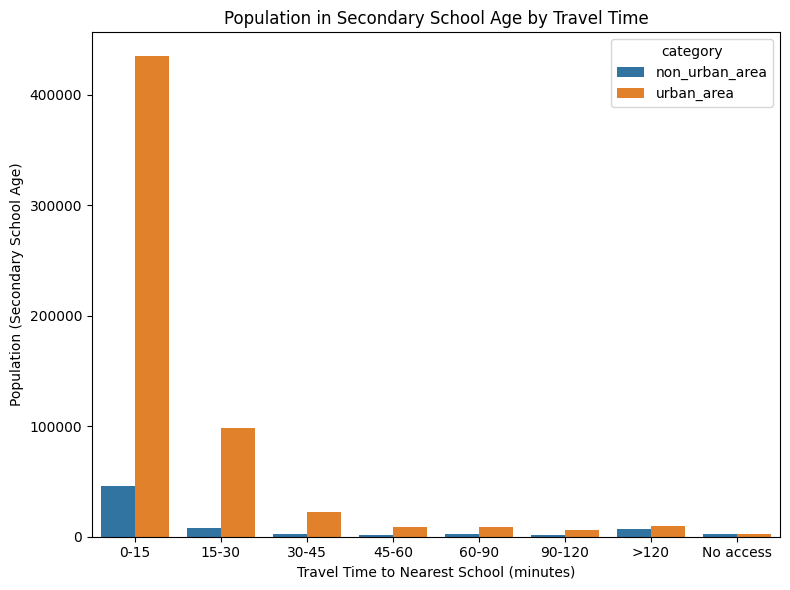

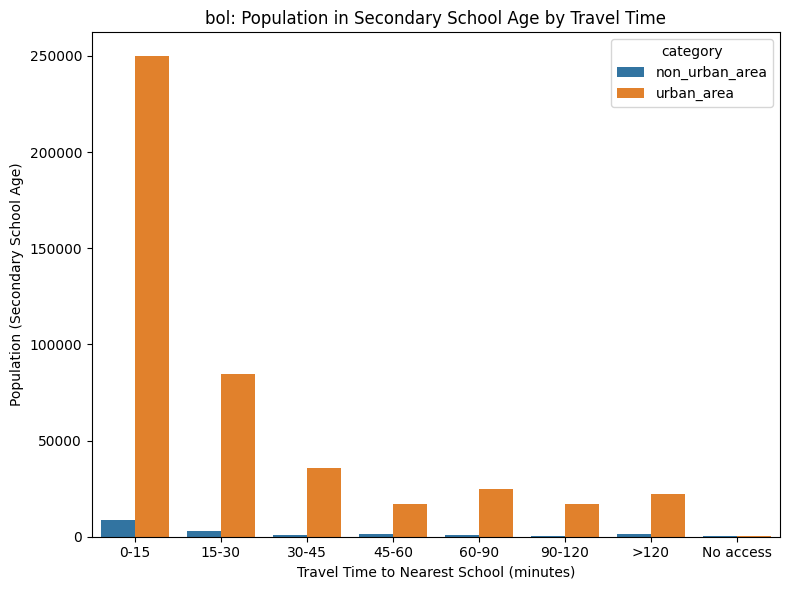

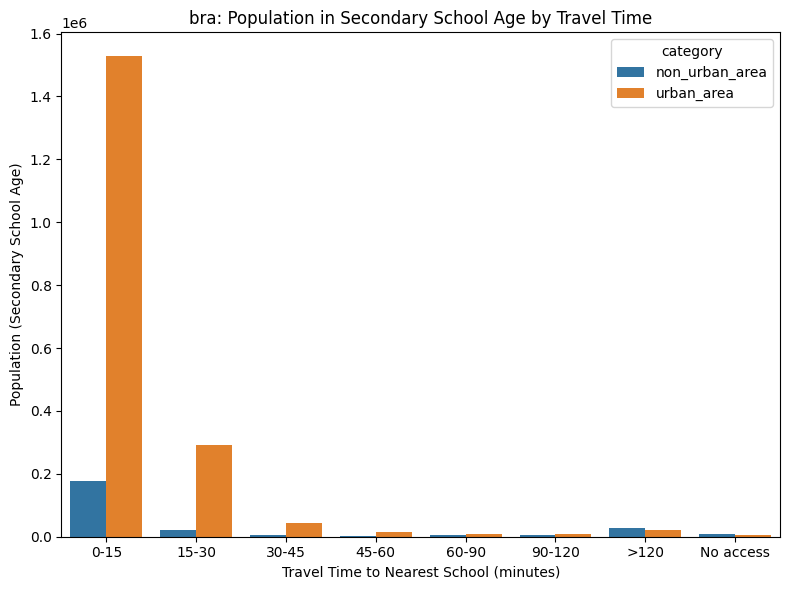

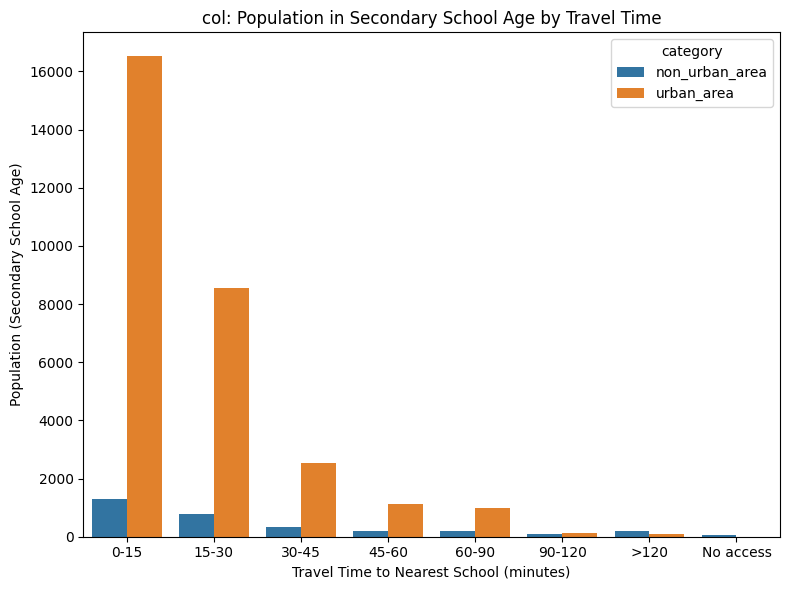

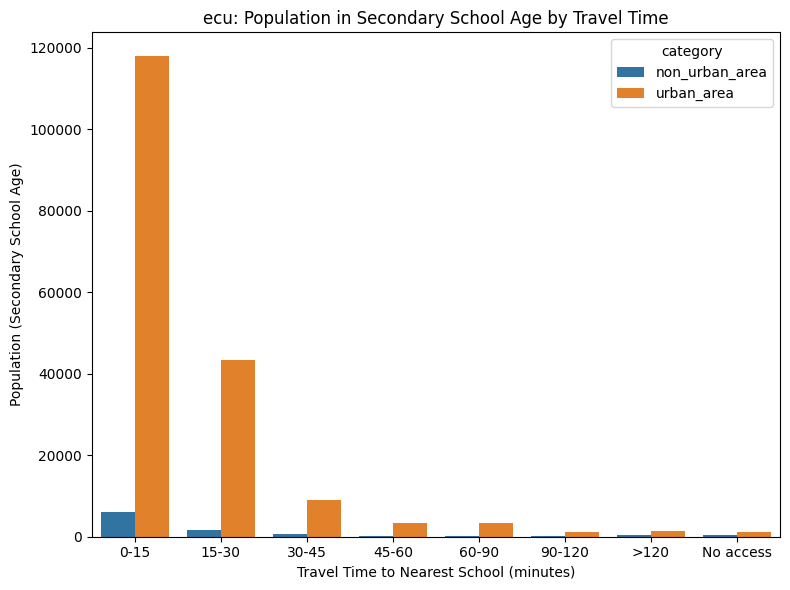

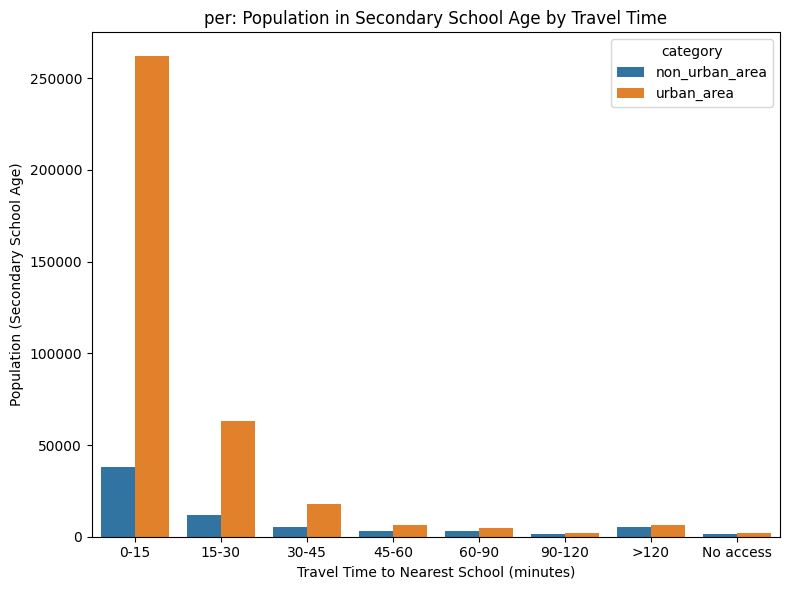

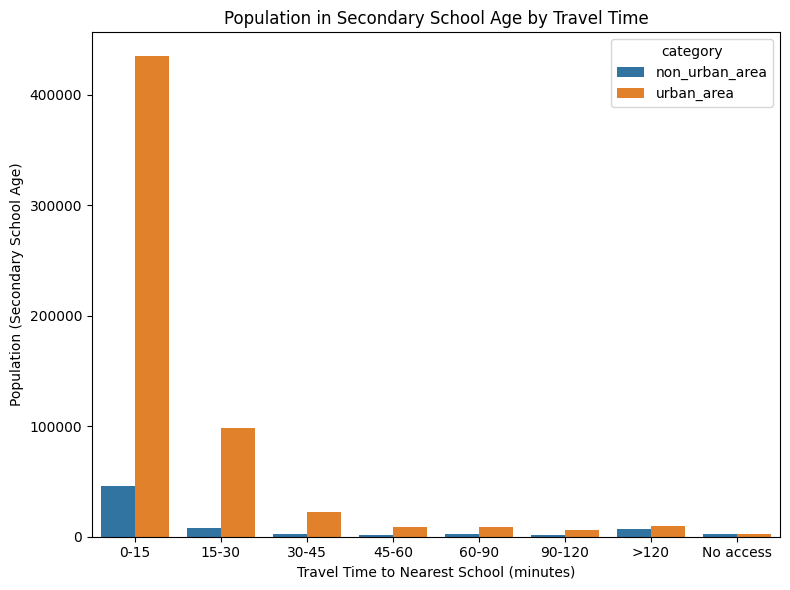

In [69]:
# Create a bar plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(
    data=result_secondary,
    x="duration_to_nearest_secondary_schools_label",
    y="pop_secondary_school_age",
    hue="category",
    errorbar=None,
)
plt.title("Population in Secondary School Age by Travel Time")
plt.xlabel("Travel Time to Nearest School (minutes)")
plt.ylabel("Population (Secondary School Age)")
plt.tight_layout()
plt.show()

In [70]:
result_secondary

,country,category,duration_to_nearest_secondary_schools_label,pop_secondary_school_age
0,bol,non_urban_area,0-15,8935.616003
1,bol,non_urban_area,15-30,2950.578892
2,bol,non_urban_area,30-45,1034.892571
3,bol,non_urban_area,45-60,1670.777721
4,bol,non_urban_area,60-90,776.932395
...,...,...,...,...
75,per,urban_area,45-60,6127.460639
76,per,urban_area,60-90,4934.305029
77,per,urban_area,90-120,2212.069012
78,per,urban_area,>120,6564.098965


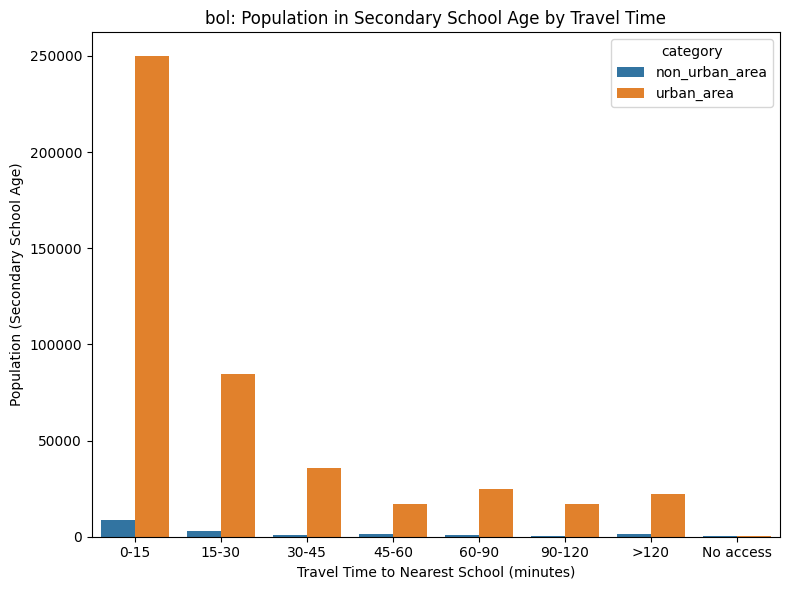

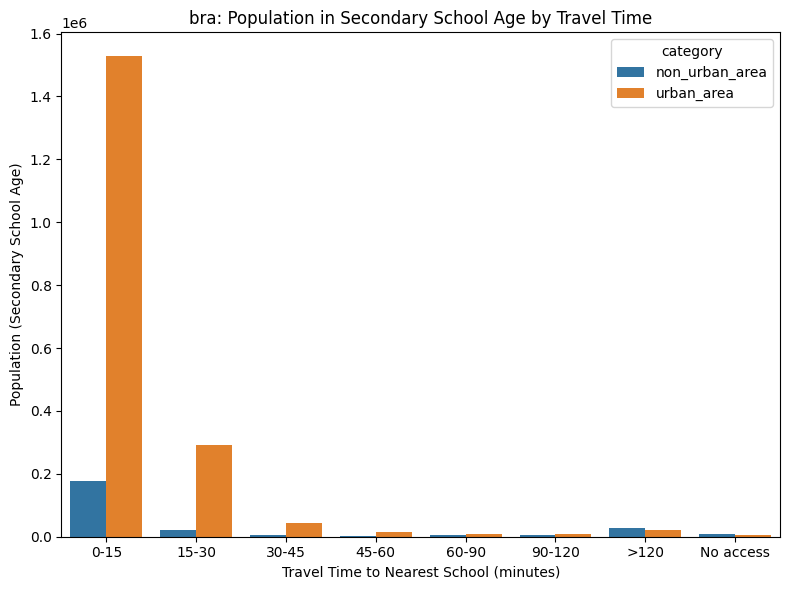

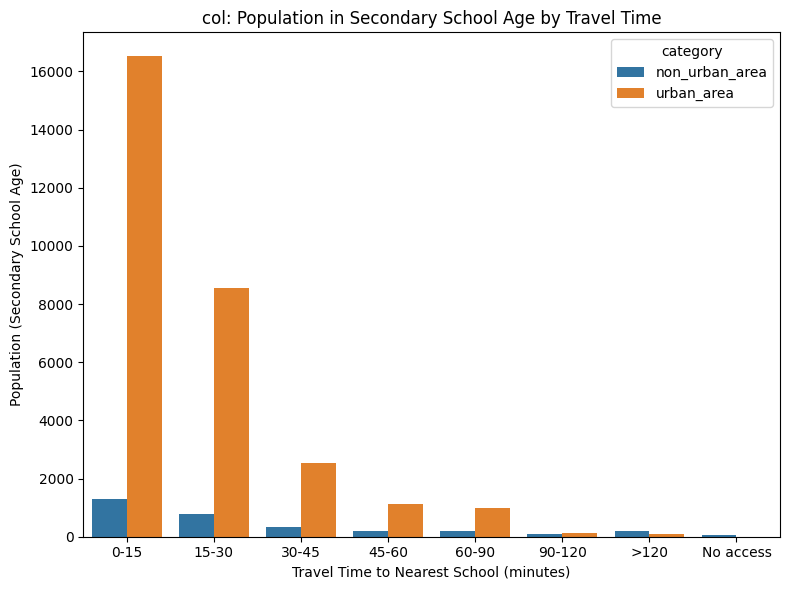

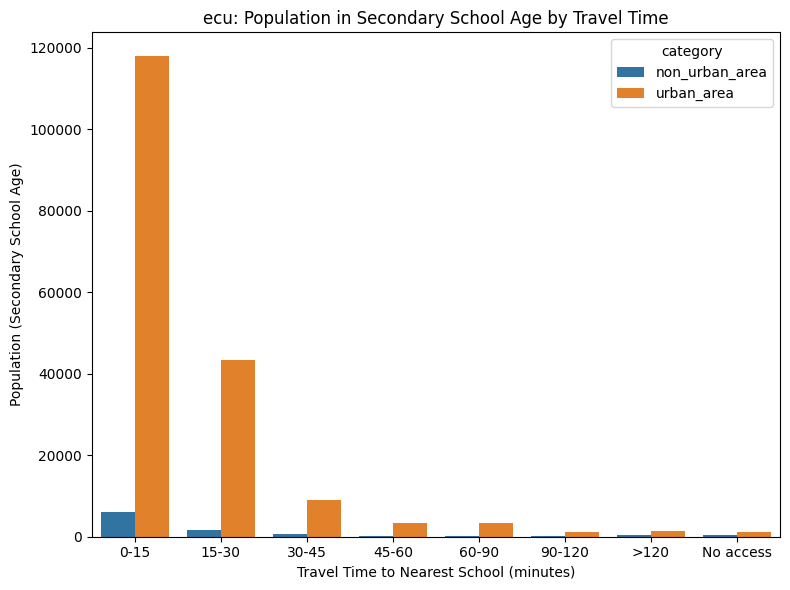

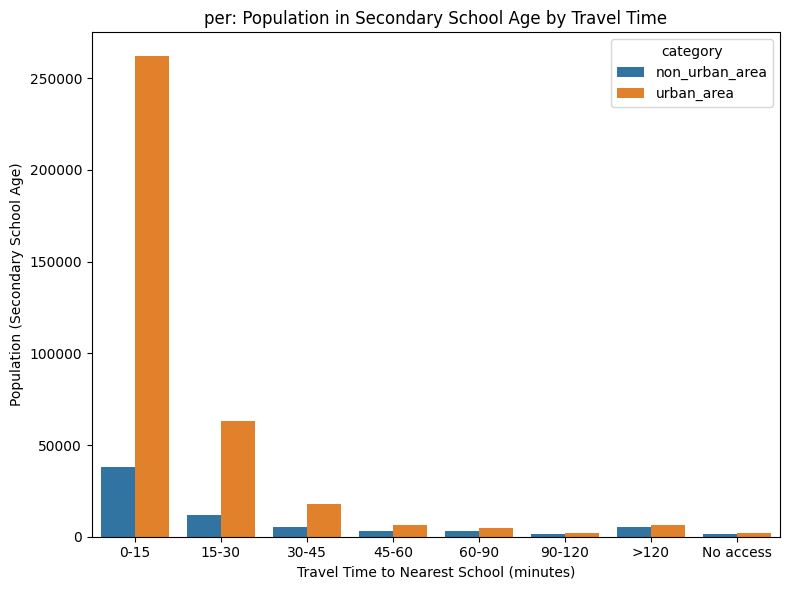

In [71]:
for col in result_secondary.country.unique():
    # Create a bar plot with seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=result_secondary[result_secondary["country"] == col],
        x="duration_to_nearest_secondary_schools_label",
        y="pop_secondary_school_age",
        hue="category",
        errorbar=None,
    )
    plt.title(f"{col}: Population in Secondary School Age by Travel Time")
    plt.xlabel("Travel Time to Nearest School (minutes)")
    plt.ylabel("Population (Secondary School Age)")
    plt.tight_layout()
    plt.savefig(f"outputs/{col}_secondary_school_access_plot.png")
    plt.show()

In [ ]:
result

In [72]:
# (optional) set a clean style
sns.set(style="whitegrid", context="talk")

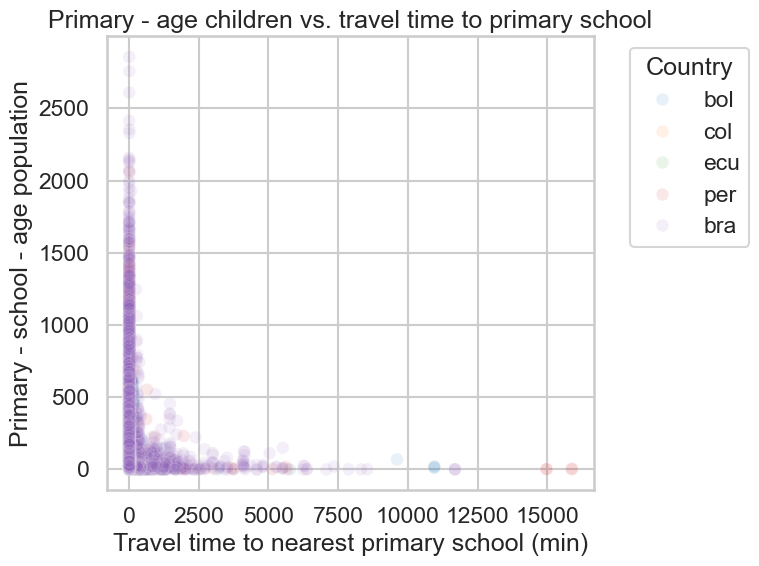

In [73]:
# make a working df
df = gdf_combined_stats.copy()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="duration_to_nearest_primary_schools",
    y="pop_primary_school_age",
    hue="country",
    palette="tab10",
    alpha=0.1,
    data=df,
)
plt.xlabel("Travel time to nearest primary school (min)")
plt.ylabel("Primary - school - age population")
plt.title("Primary - age children vs. travel time to primary school")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

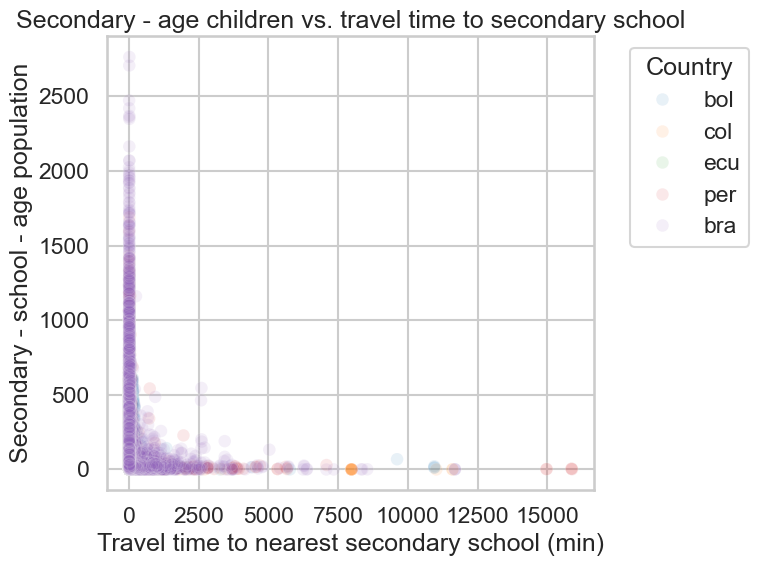

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="duration_to_nearest_secondary_schools",
    y="pop_secondary_school_age",
    hue="country",
    palette="tab10",
    alpha=0.1,
    data=df,
)
plt.xlabel("Travel time to nearest secondary school (min)")
plt.ylabel("Secondary - school - age population")
plt.title("Secondary - age children vs. travel time to secondary school")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


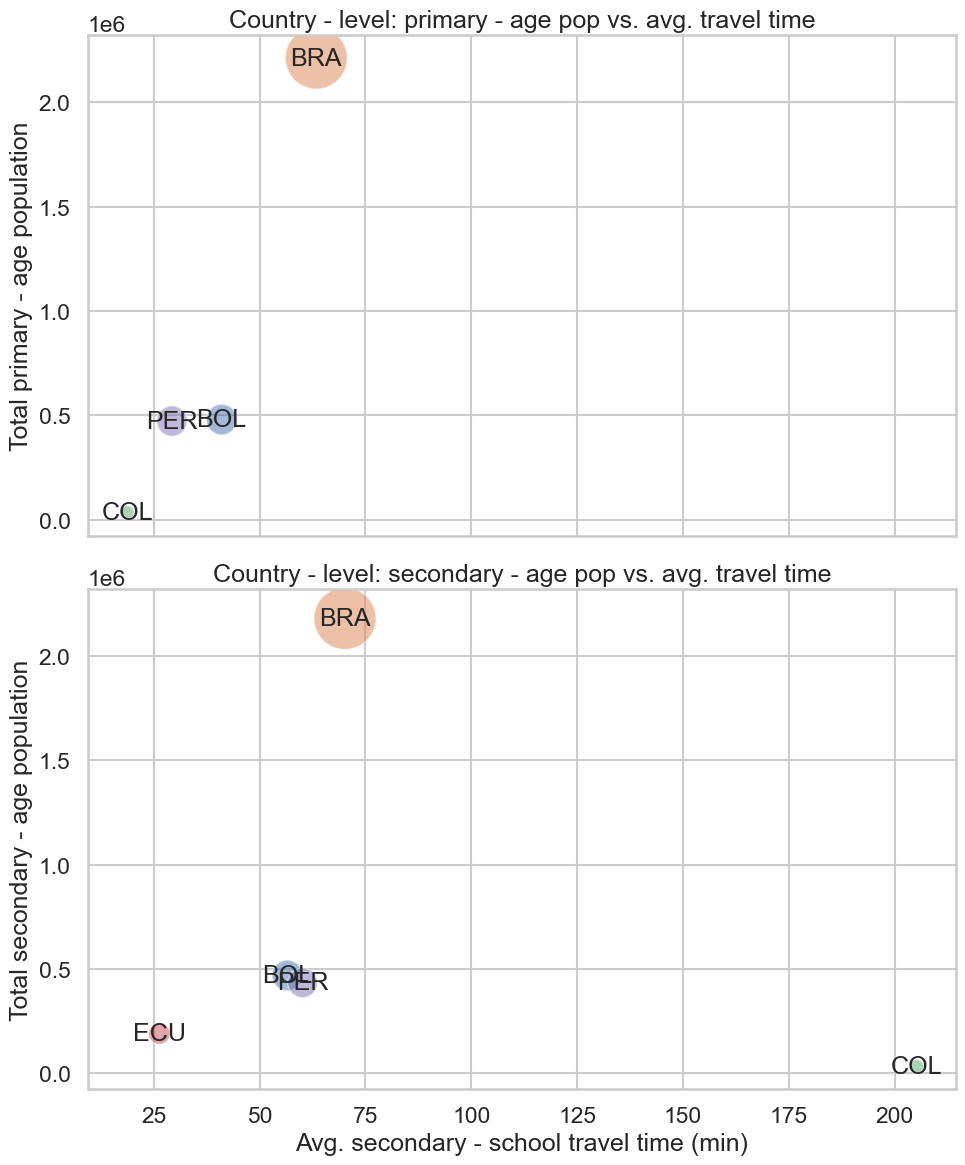

In [75]:
# aggregate by country
country_stats = (
    df.groupby("country")
    .agg(
        total_primary_pop=("pop_primary_school_age", "sum"),
        mean_primary_time=("duration_to_nearest_primary_schools", "mean"),
        total_secondary_pop=("pop_secondary_school_age", "sum"),
        mean_secondary_time=("duration_to_nearest_secondary_schools", "mean"),
    )
    .reset_index()
)

fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True, sharey=True)

# primary
sns.scatterplot(
    x="mean_primary_time",
    y="total_primary_pop",
    size="total_primary_pop",
    sizes=(100, 2000),
    hue="country",
    data=country_stats,
    legend=False,
    alpha=0.5,
    ax=ax[0],
)
for _, row in country_stats.iterrows():
    ax[0].text(
        row.mean_primary_time,
        row.total_primary_pop,
        row.country.upper(),
        horizontalalignment="center",
        verticalalignment="center",
    )
ax[0].set_xlabel("Avg. primary - school travel time (min)")
ax[0].set_ylabel("Total primary - age population")
ax[0].set_title("Country - level: primary - age pop vs. avg. travel time")


# primary
sns.scatterplot(
    x="mean_secondary_time",
    y="total_secondary_pop",
    size="total_secondary_pop",
    sizes=(100, 2000),
    hue="country",
    data=country_stats,
    legend=False,
    alpha=0.5,
    ax=ax[1],
)
for _, row in country_stats.iterrows():
    ax[1].text(
        row.mean_secondary_time,
        row.total_secondary_pop,
        row.country.upper(),
        horizontalalignment="center",
        verticalalignment="center",
    )
ax[1].set_xlabel("Avg. secondary - school travel time (min)")
ax[1].set_ylabel("Total secondary - age population")
ax[1].set_title("Country - level: secondary - age pop vs. avg. travel time")

plt.tight_layout()
plt.show()

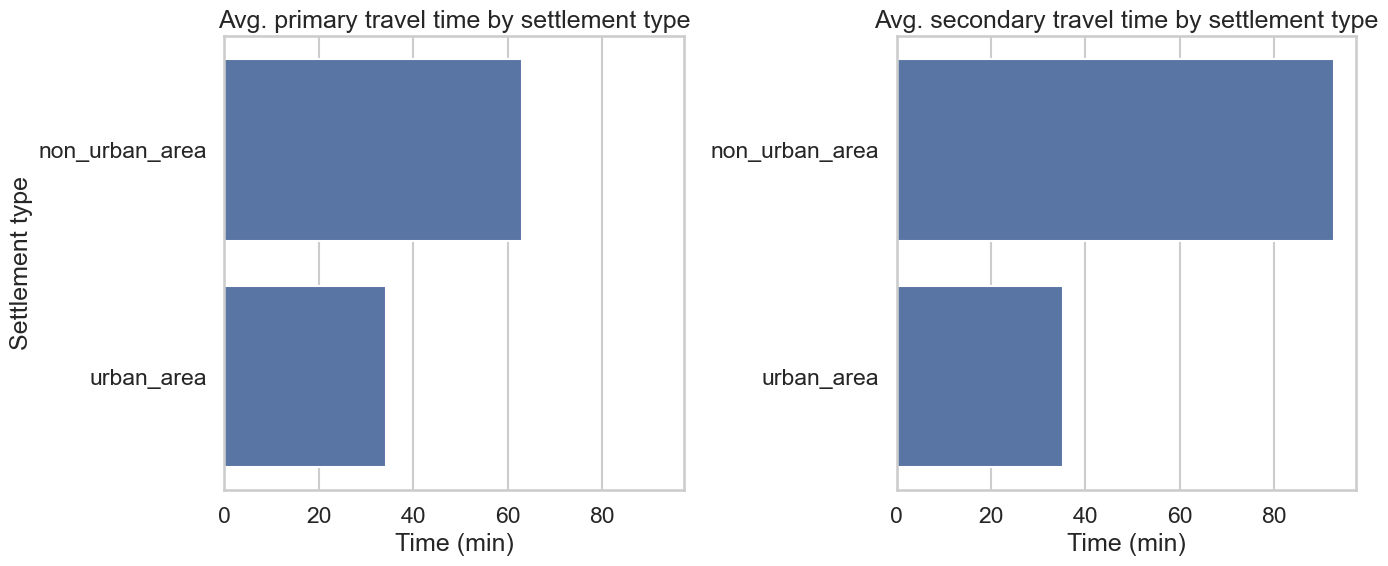

In [ ]:
category_stats = (
    df.groupby("category")
    .agg(
        total_primary_pop=("pop_primary_school_age", "sum"),
        mean_primary_time=("duration_to_nearest_primary_schools", "mean"),
        total_secondary_pop=("pop_secondary_school_age", "sum"),
        mean_secondary_time=("duration_to_nearest_secondary_schools", "mean"),
    )
    .sort_values("mean_primary_time", ascending=False)
    .reset_index()
)

# Primary
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True)
sns.barplot(
    x="mean_primary_time",
    y="category",
    data=category_stats,
    ax=ax[0],
    order=category_stats.category,
)
ax[0].set_title("Avg. primary travel time by settlement type")
ax[0].set_xlabel("Time (min)")
ax[0].set_ylabel("Settlement type")

# Secondary
sns.barplot(
    x="mean_secondary_time",
    y="category",
    data=category_stats.sort_values("mean_secondary_time", ascending=False),
    ax=ax[1],
)
ax[1].set_title("Avg. secondary travel time by settlement type")
ax[1].set_xlabel("Time (min)")
ax[1].set_ylabel("")
plt.tight_layout()
plt.show()

In [79]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [80]:
# Define duration bin order
duration_order = (
    gdf_combined_stats["duration_to_nearest_primary_schools_label"].dropna().unique()
)

In [81]:
duration_order.to_list()

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3190420451.py:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  duration_order.to_list()


['15-30', '0-15', '60-90', '30-45', '90-120', '45-60', 'No access', '>120']

In [82]:
duration_order = [
    "0-15",
    "15-30",
    "30-45",
    "45-60",
    "60-90",
    "90-120",
    ">120",
    "No access",
]

In [83]:
cmap = cm.get_cmap("viridis", len(duration_order))

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/447533463.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis", len(duration_order))


In [84]:
duration_colors = {
    label: mcolors.rgb2hex(cmap(i)) for i, label in enumerate(duration_order)
}
duration_colors

{'0-15': '#440154',
 '15-30': '#46327e',
 '30-45': '#365c8d',
 '45-60': '#277f8e',
 '60-90': '#1fa187',
 '90-120': '#4ac16d',
 '>120': '#a0da39',
 'No access': '#fde725'}

In [85]:
duration_colors["No access"] = "#808080"  # Set "No access" to gray

In [ ]:
def plot_school_age_distribution(
    education_level, hue, pop_label_df, duration_order, duration_colors, **kwargs
):
    """
    Plots the country-level distribution of school-age population by travel-time label.

    Parameters:
        education_level (str): The education level to plot ('primary', 'middle', or 'secondary').
        pop_label_df (pd.DataFrame): DataFrame with countries as index and travel-time bins as columns (absolute values).
        duration_order (list): List of travel-time bin labels in desired order.
        duration_colors (dict): Mapping from travel-time bin label to color.
    """

    # pivot to get total secondary‐age pop by country × label
    pop_label_country_sec = (
        pop_label_df.groupby(
            [hue, f"duration_to_nearest_{education_level}_schools_label"]
        )[f"pop_{education_level}_school_age"]
        .sum()
        .unstack(fill_value=0)
    )

    # Convert to fractions (so bars sum to 1)
    pop_label_pct = pop_label_country_sec.div(pop_label_country_sec.sum(axis=1), axis=0)

    # Plot
    ax = pop_label_pct[duration_order].plot(
        kind="bar",
        stacked=True,
        figsize=(10, 6),
        color=[duration_colors[label] for label in duration_order],
        width=0.8,
        **kwargs,
    )
    ax.set_ylabel(f"Percentage of {education_level.capitalize()} population")
    ax.set_xlabel(hue.capitalize())
    ax.set_title(f"{education_level.capitalize()} age population by travel time bins")
    ax.legend(title="Travel time (min)", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Invert the order of the legend to match the order of the bars
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles[::-1],
        labels[::-1],
        title="Travel time (min)",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )

    plt.tight_layout()
    plt.show()

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3485761825.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_label_df.groupby(


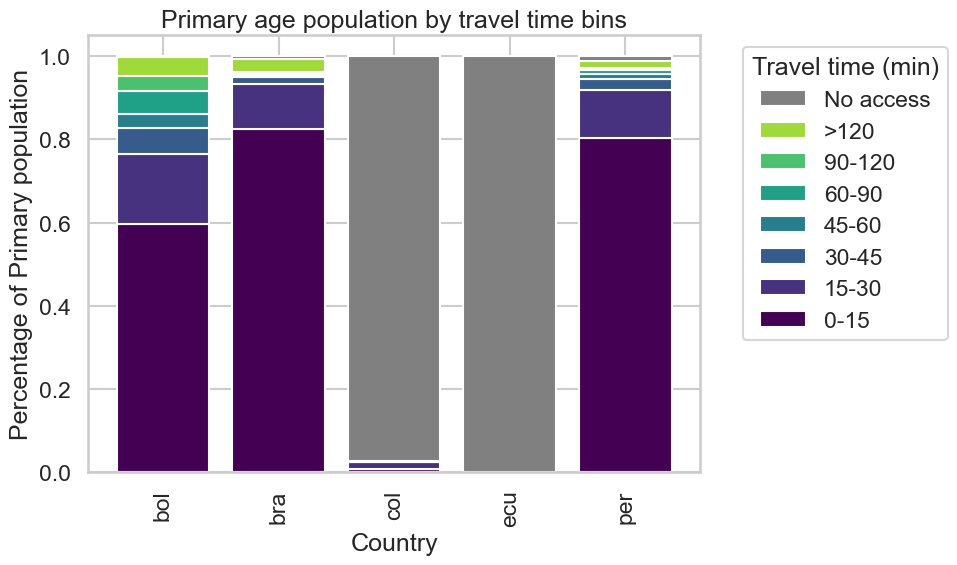

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3485761825.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_label_df.groupby(


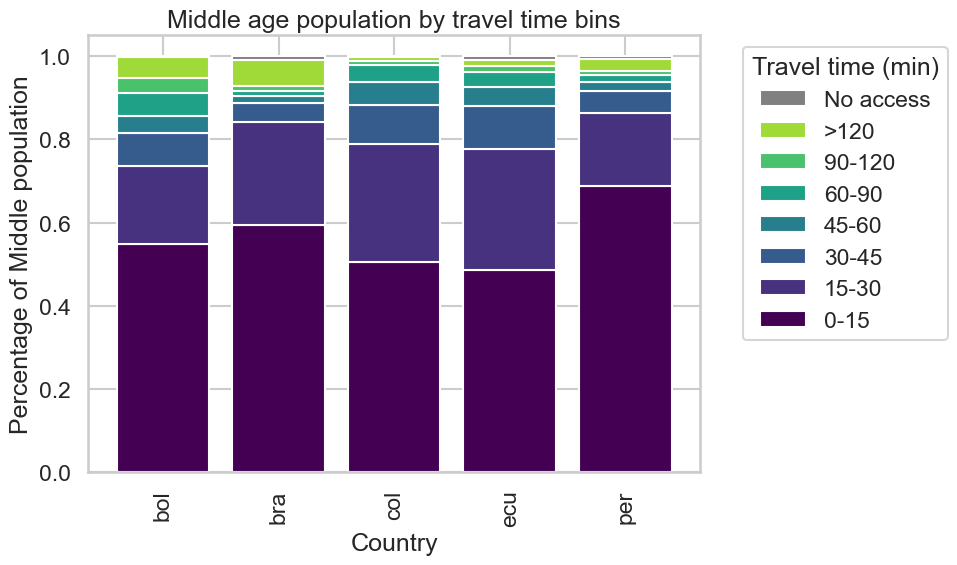

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3485761825.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_label_df.groupby(


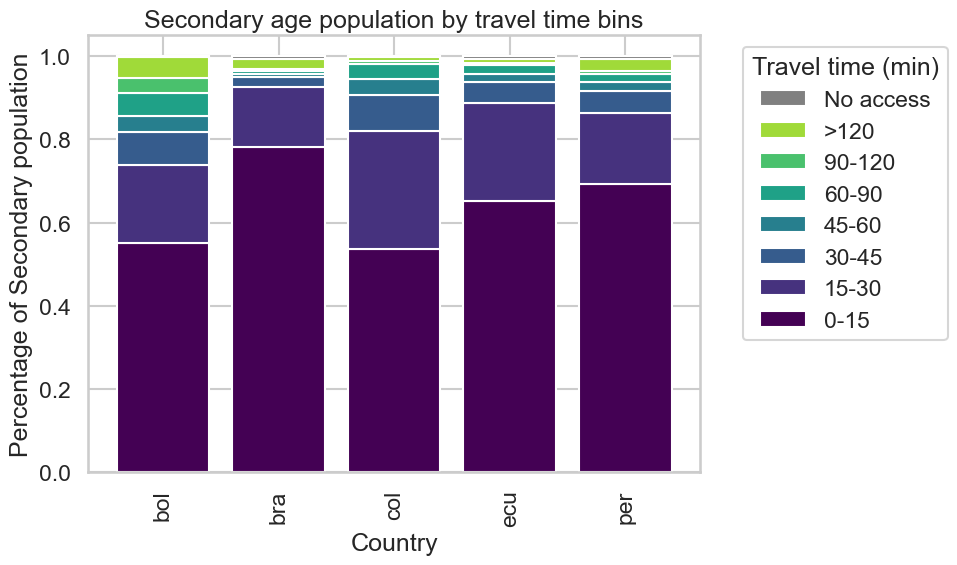

In [108]:
plot_school_age_distribution(
    "primary", "country", gdf_combined_stats, duration_order, duration_colors
)
plot_school_age_distribution(
    "middle", "country", gdf_combined_stats, duration_order, duration_colors
)
plot_school_age_distribution(
    "secondary", "country", gdf_combined_stats, duration_order, duration_colors
)

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3485761825.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_label_df.groupby(


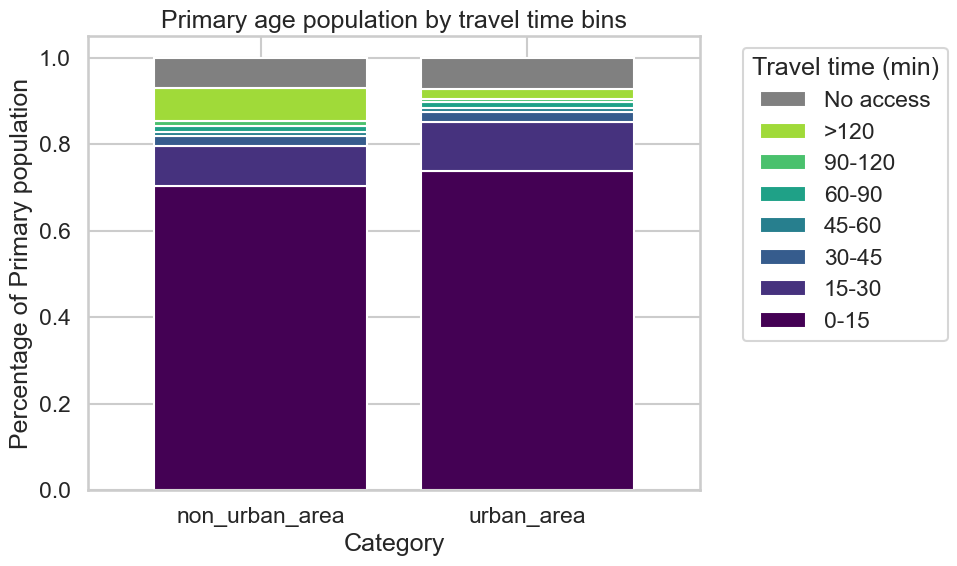

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3485761825.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_label_df.groupby(


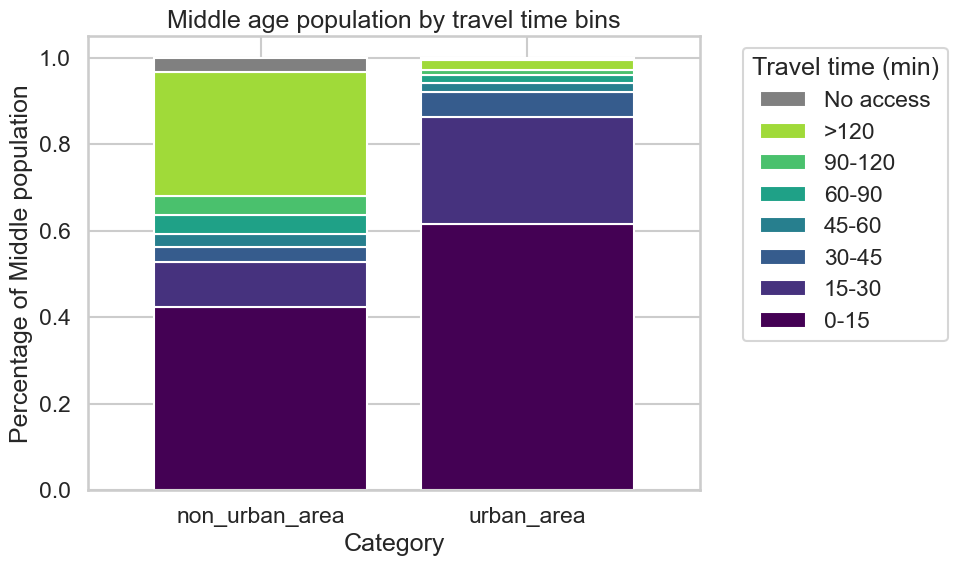

/var/folders/2v/rfkdf8zd7yx_k7lff_2bchrr0000gn/T/ipykernel_27189/3485761825.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_label_df.groupby(


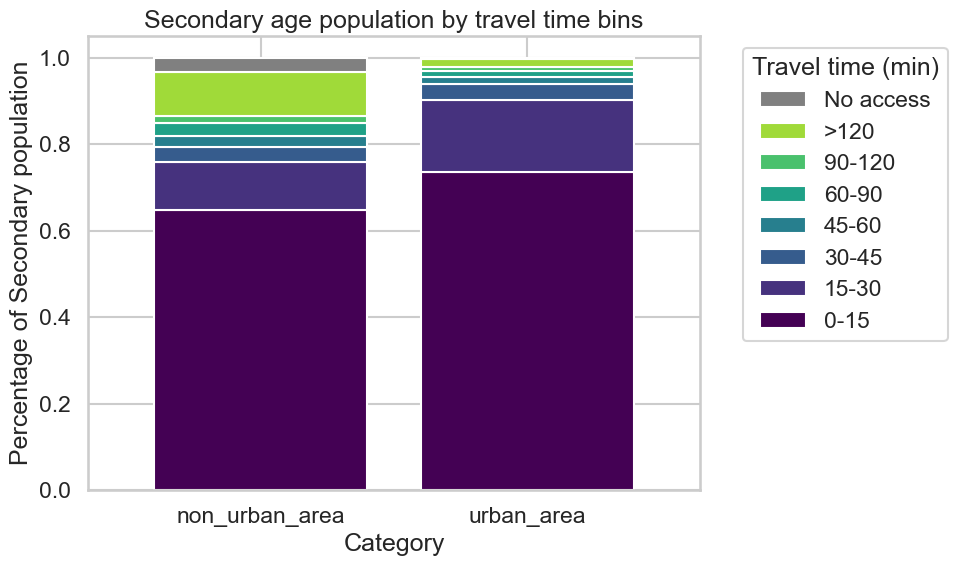

In [ ]:
plot_school_age_distribution(
    "primary",
    "category",
    gdf_combined_stats,
    duration_order,
    duration_colors,
    rot=0,
)
plot_school_age_distribution(
    "middle",
    "category",
    gdf_combined_stats,
    duration_order,
    duration_colors,
    rot=0,
)
plot_school_age_distribution(
    "secondary",
    "category",
    gdf_combined_stats,
    duration_order,
    duration_colors,
    rot=0,
)

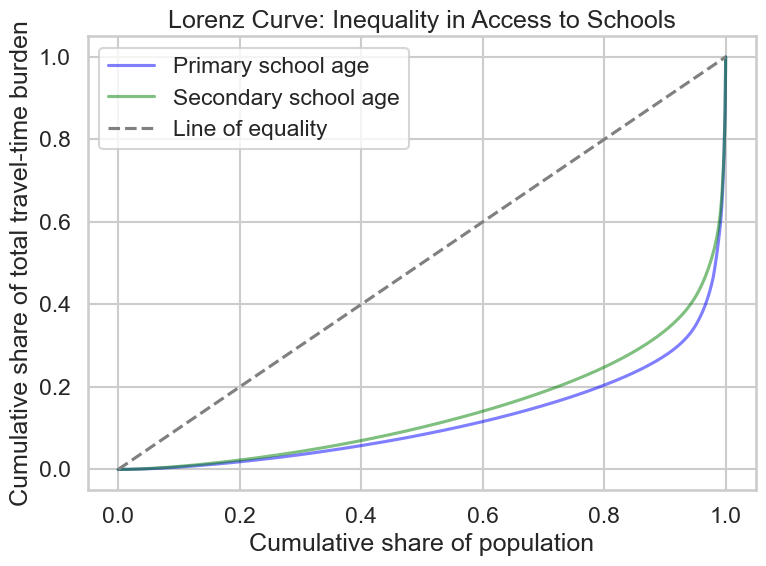

In [117]:
# Create a copy with relevant columns
df_lorenz = (
    gdf_combined_stats[
        ["duration_to_nearest_primary_schools", "pop_primary_school_age"]
    ]
    .dropna()
    .copy()
)

# Remove zero-pop cells
df_lorenz = df_lorenz[df_lorenz.pop_primary_school_age > 0]

# Sort by duration
df_lorenz.sort_values("duration_to_nearest_primary_schools", inplace=True)

# Compute cumulative population and cumulative share
df_lorenz["cum_pop"] = df_lorenz["pop_primary_school_age"].cumsum()
df_lorenz["cum_pop_share"] = (
    df_lorenz["cum_pop"] / df_lorenz["pop_primary_school_age"].sum()
)

# Weight durations by population (population-weighted Lorenz curve)
df_lorenz["duration_weighted"] = (
    df_lorenz["duration_to_nearest_primary_schools"]
    * df_lorenz["pop_primary_school_age"]
)
df_lorenz["cum_duration"] = df_lorenz["duration_weighted"].cumsum()
df_lorenz["cum_duration_share"] = (
    df_lorenz["cum_duration"] / df_lorenz["duration_weighted"].sum()
)

# Create a copy with relevant columns
df_lorenz_sec = (
    gdf_combined_stats[
        ["duration_to_nearest_secondary_schools", "pop_secondary_school_age"]
    ]
    .dropna()
    .copy()
)

# Remove zero-pop cells
df_lorenz_sec = df_lorenz_sec[df_lorenz_sec.pop_secondary_school_age > 0]

# Sort by duration
df_lorenz_sec.sort_values("duration_to_nearest_secondary_schools", inplace=True)

# Compute cumulative population and cumulative share
df_lorenz_sec["cum_pop"] = df_lorenz_sec["pop_secondary_school_age"].cumsum()
df_lorenz_sec["cum_pop_share"] = (
    df_lorenz_sec["cum_pop"] / df_lorenz_sec["pop_secondary_school_age"].sum()
)

# Weight durations by population (population-weighted Lorenz curve)
df_lorenz_sec["duration_weighted"] = (
    df_lorenz_sec["duration_to_nearest_secondary_schools"]
    * df_lorenz_sec["pop_secondary_school_age"]
)
df_lorenz_sec["cum_duration"] = df_lorenz_sec["duration_weighted"].cumsum()
df_lorenz_sec["cum_duration_share"] = (
    df_lorenz_sec["cum_duration"] / df_lorenz_sec["duration_weighted"].sum()
)

# Plot both Lorenz curves on the same plot
plt.figure(figsize=(8, 6))
plt.plot(
    df_lorenz["cum_pop_share"],
    df_lorenz["cum_duration_share"],
    label="Primary school age",
    color="blue",
    alpha=0.5,
)
plt.plot(
    df_lorenz_sec["cum_pop_share"],
    df_lorenz_sec["cum_duration_share"],
    label="Secondary school age",
    color="green",
    alpha=0.5,
)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Line of equality")
plt.title("Lorenz Curve: Inequality in Access to Schools")
plt.xlabel("Cumulative share of population")
plt.ylabel("Cumulative share of total travel-time burden")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

TypeError: Axes.bxp() got an unexpected keyword argument 'position'

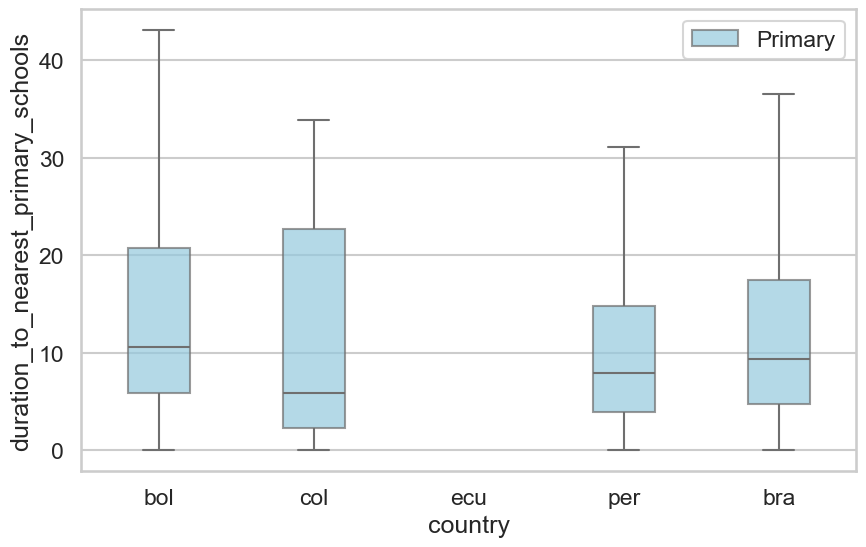

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=gdf_combined_stats[gdf_combined_stats["pop_primary_school_age"] > 0],
    x="country",
    y="duration_to_nearest_primary_schools",
    color="skyblue",
    showfliers=False,
    width=0.4,
    # position=1,
    boxprops=dict(alpha=0.7),
    linewidth=1.5,
    dodge=True,
    label="Primary",
)
sns.boxplot(
    data=gdf_combined_stats[gdf_combined_stats["pop_secondary_school_age"] > 0],
    x="country",
    y="duration_to_nearest_secondary_schools",
    color="orange",
    showfliers=False,
    width=0.4,
    position=0,
    boxprops=dict(alpha=0.7),
    linewidth=1.5,
    dodge=True,
    label="Secondary",
)
plt.ylabel("Travel time to school (min)")
plt.title("Distribution of Travel Times to Schools by Country")
plt.legend(
    handles=[
        plt.Line2D([0], [0], color="skyblue", lw=8, label="Primary"),
        plt.Line2D([0], [0], color="orange", lw=8, label="Secondary"),
    ]
)
plt.tight_layout()
plt.show()

In [120]:
# Summary stats for Ecuador
ecuador = gdf_combined_stats[gdf_combined_stats["country"] == "ecu"]
print("Number of rows for Ecuador:", len(ecuador))
print("Non-zero population cells:", (ecuador["pop_primary_school_age"] > 0).sum())
print(
    "Non-null durations:",
    ecuador["duration_to_nearest_primary_schools"].notnull().sum(),
)
print(
    "Unique duration values:", ecuador["duration_to_nearest_primary_schools"].unique()
)

Number of rows for Ecuador: 3233
Non-zero population cells: 3229
Non-null durations: 0
Unique duration values: [nan]


In [121]:
gdf_combined_stats[gdf_combined_stats["country"] == "ecu"][
    ["pop_primary_school_age", "duration_to_nearest_primary_schools"]
].describe()

,pop_primary_school_age,duration_to_nearest_primary_schools
count,3233.000000,0.0
mean,58.617051,NaN
std,95.289797,NaN
min,0.000000,NaN
25%,11.500150,NaN
50%,25.713078,NaN
75%,56.071711,NaN
max,592.126485,NaN


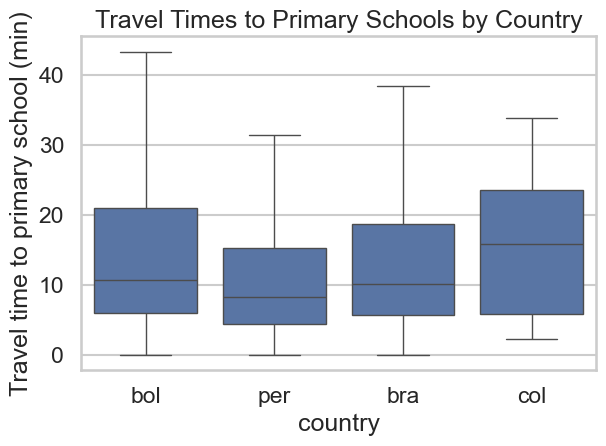

In [122]:
sns.boxplot(
    data=gdf_combined_stats[
        (gdf_combined_stats["pop_primary_school_age"] > 0)
        & (gdf_combined_stats["duration_to_nearest_primary_schools"] > 0)
    ],
    x="country",
    y="duration_to_nearest_primary_schools",
    showfliers=False,  # hide outliers for readability,
)
plt.ylabel("Travel time to primary school (min)")
plt.title("Travel Times to Primary Schools by Country")
plt.tight_layout()
plt.show()

In [126]:
gdf_combined_stats[gdf_combined_stats["pop_primary_school_age"] > 0]

,cell_id,category,country,pop_total,pop_primary_school_age,pop_middle_school_age,pop_secondary_school_age,distance_to_nearest_primary_schools,duration_to_nearest_primary_schools,duration_to_nearest_primary_schools_label,distance_to_nearest_middle_schools,duration_to_nearest_middle_schools,duration_to_nearest_middle_schools_label,distance_to_nearest_secondary_schools,duration_to_nearest_secondary_schools,duration_to_nearest_secondary_schools_label
1,13956,non_urban_area,bol,0.205296,0.071269,0.068739,0.069190,1.0347,12.415000,0-15,1.0347,12.415000,0-15,1.0347,12.415000,0-15
2,13993,non_urban_area,bol,4.057443,1.408542,1.358551,1.367463,0.2030,2.436667,0-15,0.2030,2.436667,0-15,0.2030,2.436667,0-15
3,13998,non_urban_area,bol,2.743381,0.952365,0.918565,0.924590,0.5786,6.943333,0-15,0.5786,6.943333,0-15,0.5786,6.943333,0-15
4,14081,non_urban_area,bol,2.388741,0.829252,0.799821,0.805067,0.5990,7.186667,0-15,0.5990,7.186667,0-15,0.5990,7.186667,0-15
5,14082,non_urban_area,bol,3.350793,1.163228,1.121944,1.129303,1.2527,15.031667,15-30,1.2527,15.031667,15-30,1.2527,15.031667,15-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35274,36064,non_urban_area,bra,54.106565,18.346852,18.122688,18.605674,0.6941,8.326667,0-15,1.0120,12.140000,0-15,1.2067,14.478333,0-15
35275,36111,urban_area,bra,164.117073,55.650026,54.970085,56.435085,0.5403,6.485000,0-15,1.4748,17.700000,15-30,0.8754,10.505000,0-15
35276,36112,urban_area,bra,584.130272,198.071198,195.651138,200.865410,1.1270,13.518333,0-15,0.3803,4.563333,0-15,0.3803,4.563333,0-15
35277,36127,urban_area,bra,563.737473,191.156258,188.820686,193.852913,0.8928,10.716667,0-15,1.5174,18.211667,15-30,0.4219,5.063333,0-15


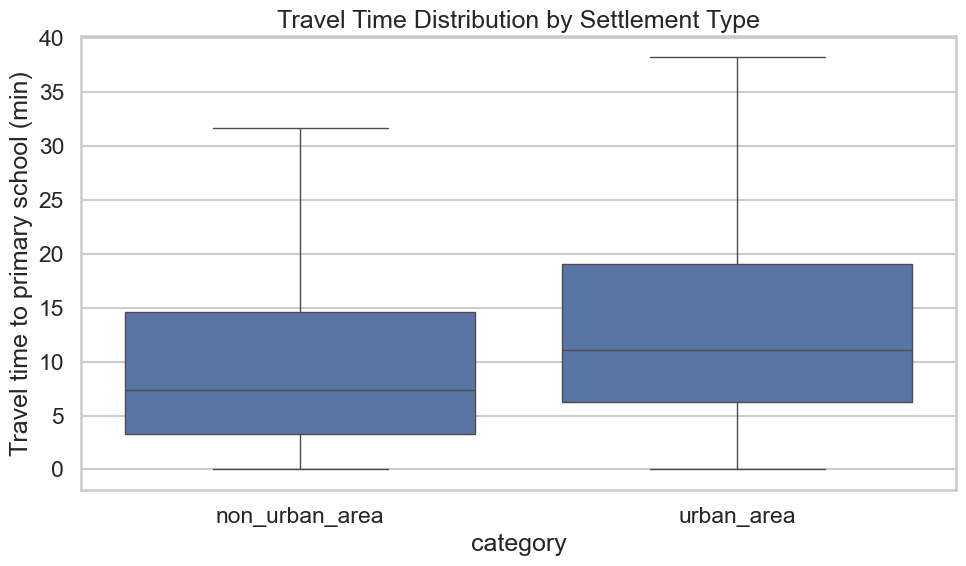

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=gdf_combined_stats[gdf_combined_stats["pop_primary_school_age"] > 0],
    x="category",
    y="duration_to_nearest_primary_schools",
    order=["non_urban_area", "urban_area"],
    showfliers=False,
)
plt.ylabel("Travel time to primary school (min)")
plt.title("Travel Time Distribution by Settlement Type")
plt.tight_layout()
plt.show()

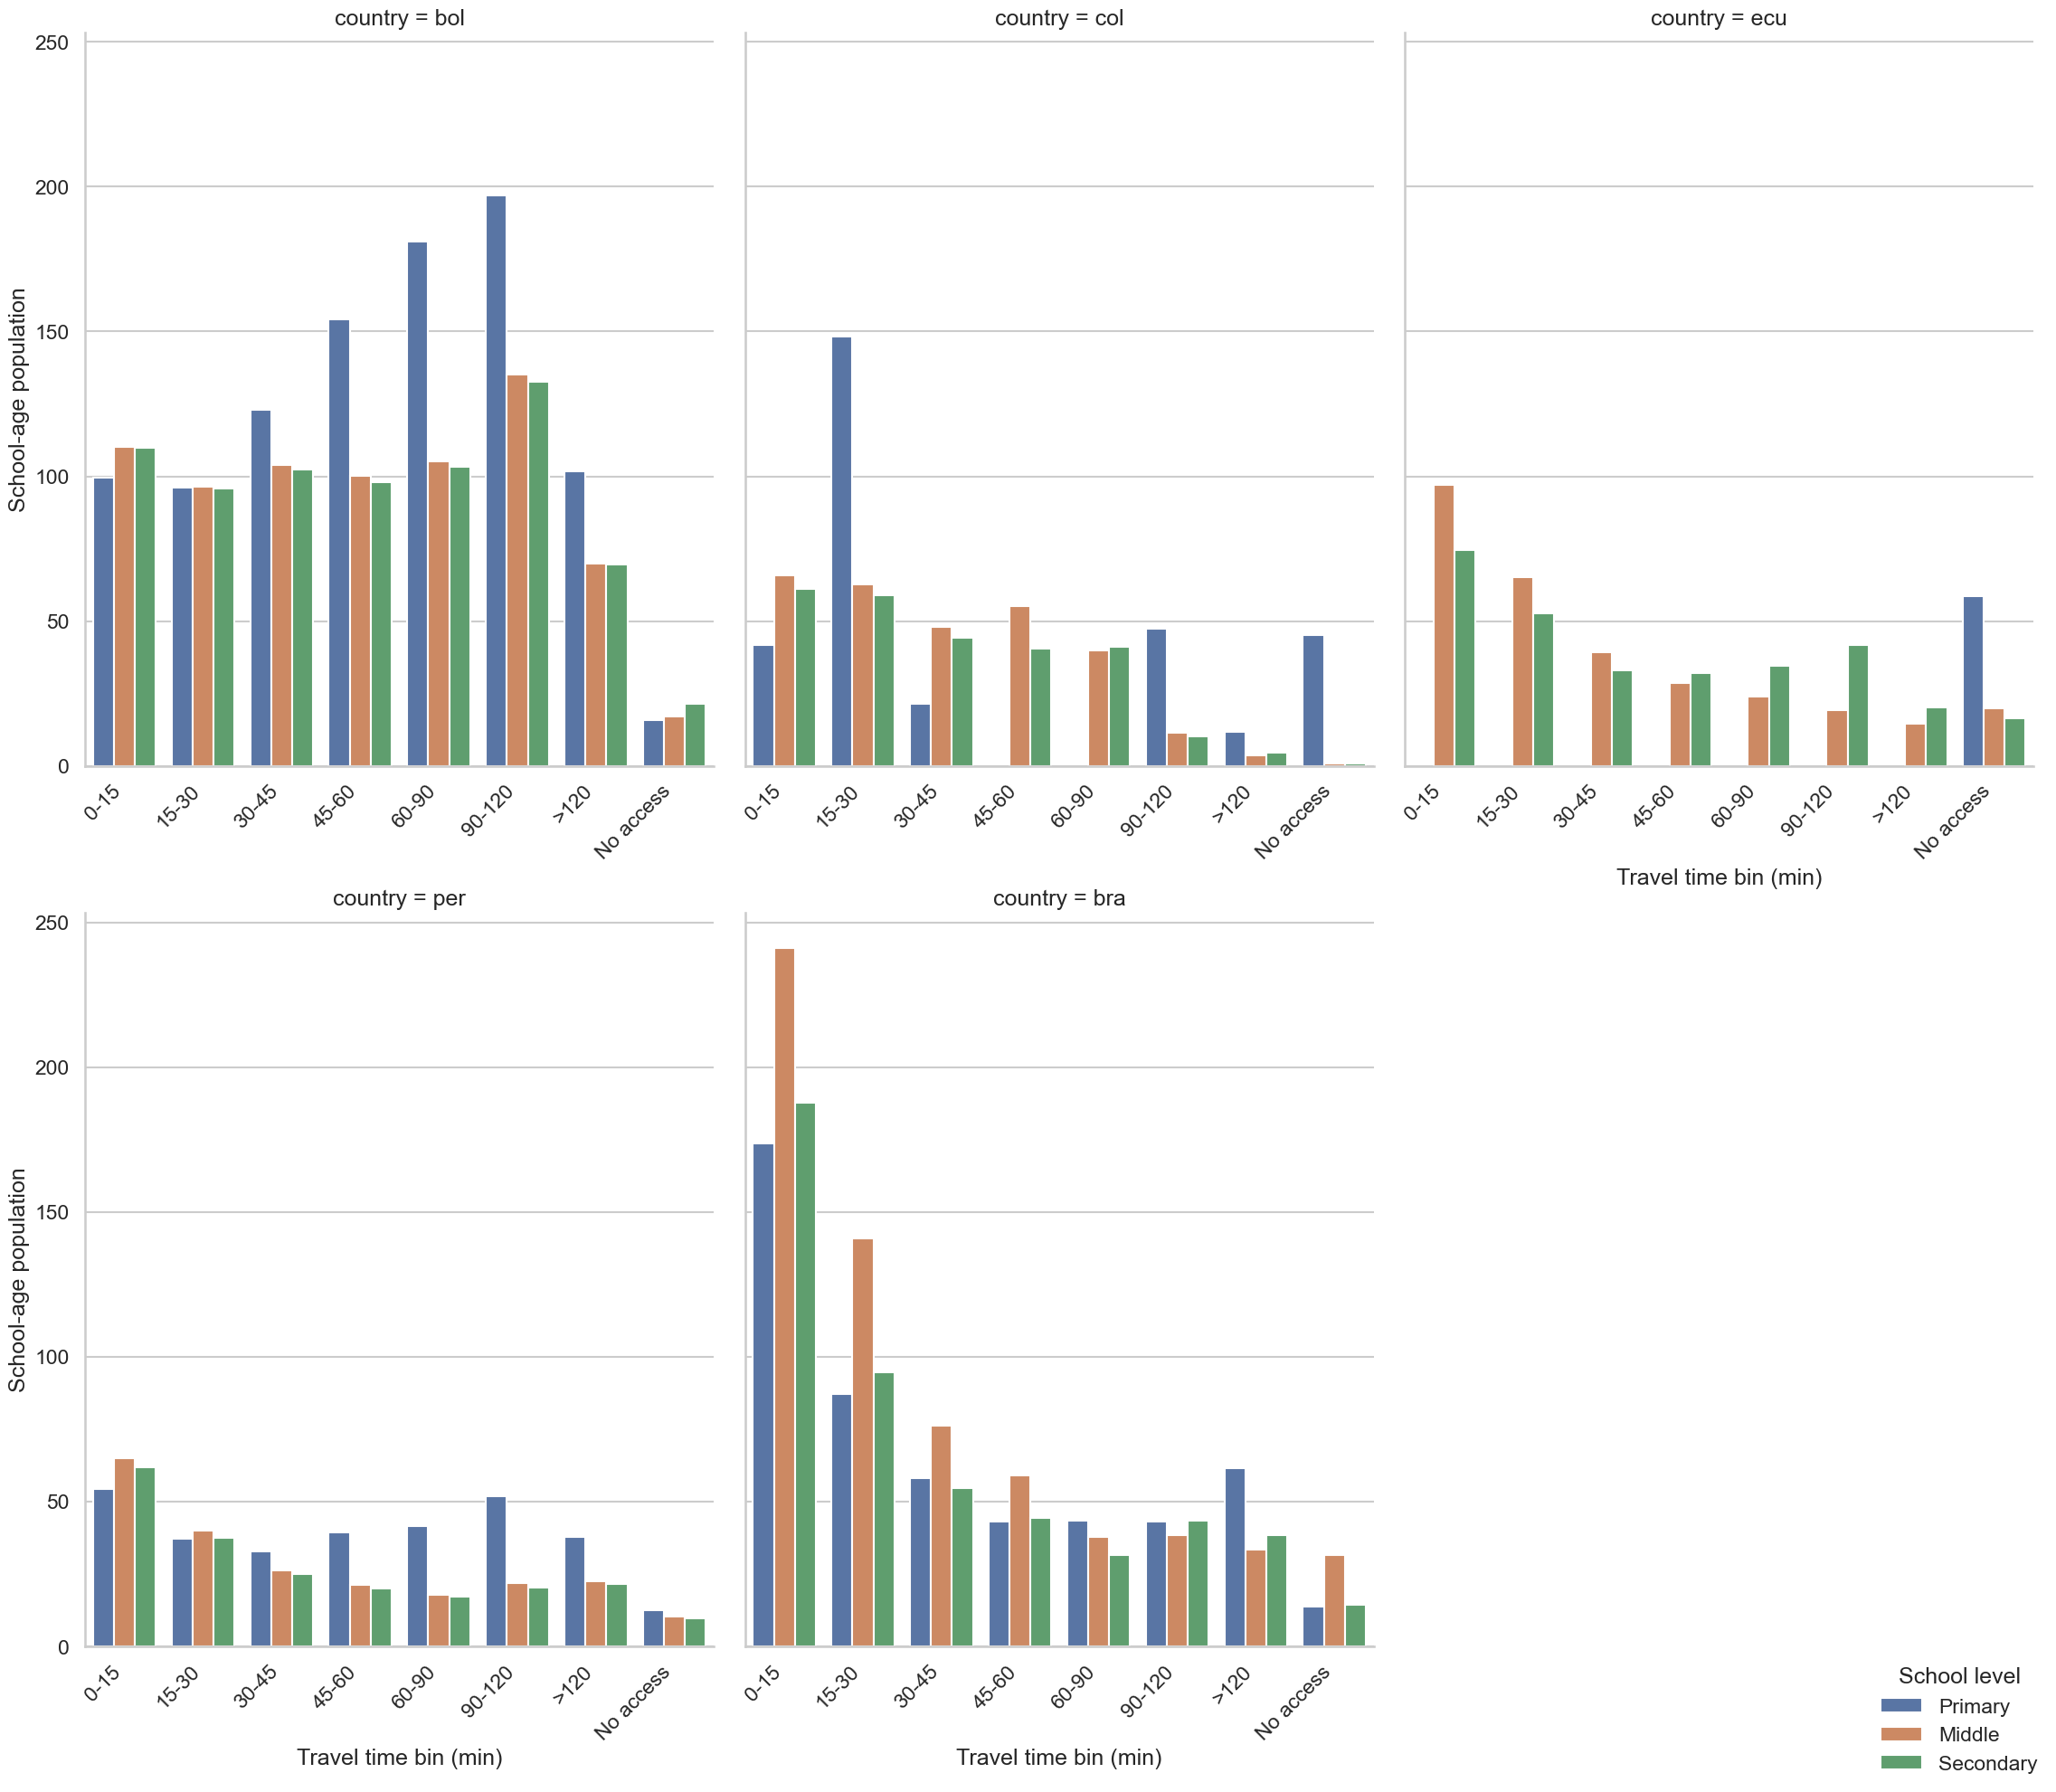

In [ ]:
# Make sure all needed columns are included in the copy
df_facet = gdf_combined_stats[
    [
        "country",
        "category",
        "pop_primary_school_age",
        "pop_middle_school_age",
        "pop_secondary_school_age",
        "duration_to_nearest_primary_schools_label",
        "duration_to_nearest_middle_schools_label",
        "duration_to_nearest_secondary_schools_label",
    ]
].copy()

# Melt the population columns
df_melted = pd.melt(
    df_facet,
    id_vars=[
        "country",
        "category",
        "duration_to_nearest_primary_schools_label",
        "duration_to_nearest_middle_schools_label",
        "duration_to_nearest_secondary_schools_label",
    ],
    value_vars=[
        "pop_primary_school_age",
        "pop_middle_school_age",
        "pop_secondary_school_age",
    ],
    var_name="school_level",
    value_name="pop_school_age",
)

# Assign matching duration labels
df_melted["duration_label"] = df_melted.apply(
    lambda row: (
        row["duration_to_nearest_primary_schools_label"]
        if row["school_level"] == "pop_primary_school_age"
        else (
            row["duration_to_nearest_middle_schools_label"]
            if row["school_level"] == "pop_middle_school_age"
            else row["duration_to_nearest_secondary_schools_label"]
        )
    ),
    axis=1,
)

# Clean up school level name
df_melted["school_level"] = df_melted["school_level"].map(
    {
        "pop_primary_school_age": "Primary",
        "pop_middle_school_age": "Middle",
        "pop_secondary_school_age": "Secondary",
    }
)

# Filter out zero-pop rows
df_melted = df_melted[df_melted["pop_school_age"] > 0]

# Facet by country
g = sns.catplot(
    data=df_melted,
    kind="bar",
    x="duration_label",
    y="pop_school_age",
    hue="school_level",
    hue_order=["Primary", "Middle", "Secondary"],
    col="country",
    col_wrap=3,
    order=duration_order,
    height=10,
    aspect=0.7,
    errorbar=None,
    sharex=False,
    sharey=True,
)

g.set_axis_labels("Travel time bin (min)", "School-age population")
# g.set_titles("Country: {col_name}")
g._legend.set_title("School level")
g._legend.set_loc("lower right")
# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
# plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()